# Zomato Restaurant Project

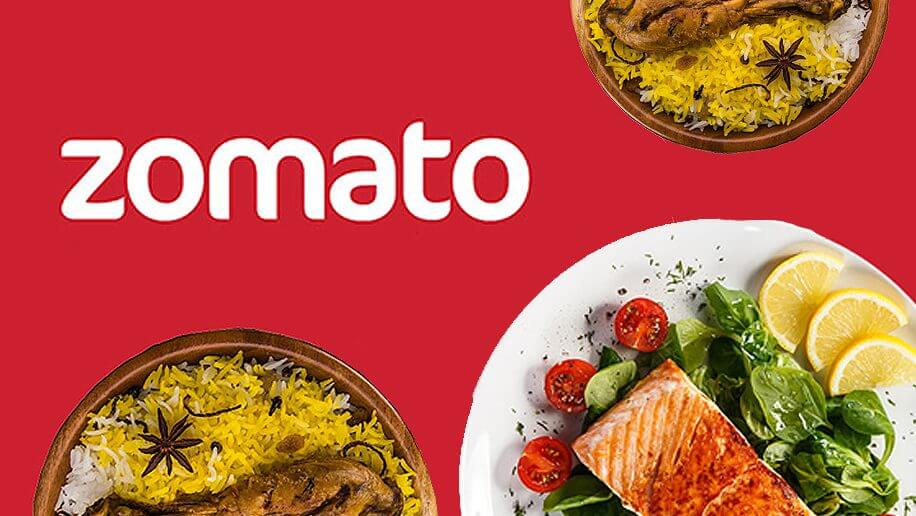



Problem Statement:
    
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import matplotlib_inline
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import xgboost as xgb
import missingno

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
import statsmodels.api as sm
from scipy import stats
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import VotingRegressor,VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE,SMOTEN,SMOTENC,SVMSMOTE
import joblib

In [107]:
df1=pd.read_csv('Zomato.csv')
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [109]:
df1.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


Checking the first 5 and last 5 rows of our entire dataset. We can see that the total number of rows and columns in our dataframe. In our problem statement we are asked to predict the Price range and Average Cost for two

In [110]:
pd.set_option('display.max_columns', None)

Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.

In [111]:
df1.shape

(9551, 21)

In [112]:
df2=pd.read_csv('country code',sep='\t')
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [113]:
df2.shape

(15, 2)

In [114]:
df=pd.merge(df1,df2,on="Country Code",how='left')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


we will get new dataframe df after merging both dataframe df1 and df2 on country code.

In [115]:
df.shape

(9551, 22)

The dataset contains the detalis of Zomato project. This dataset is comprised of 22 columns including two target variables Average Cost for two and Price range where we need to predict both.So we have a total of 9551 rows and 22 columns.

In [116]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

14 object data types and 8 numerical data types

In [118]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [119]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

No column have huge data missing except cuisines which has 9 datamissing.

<AxesSubplot:>

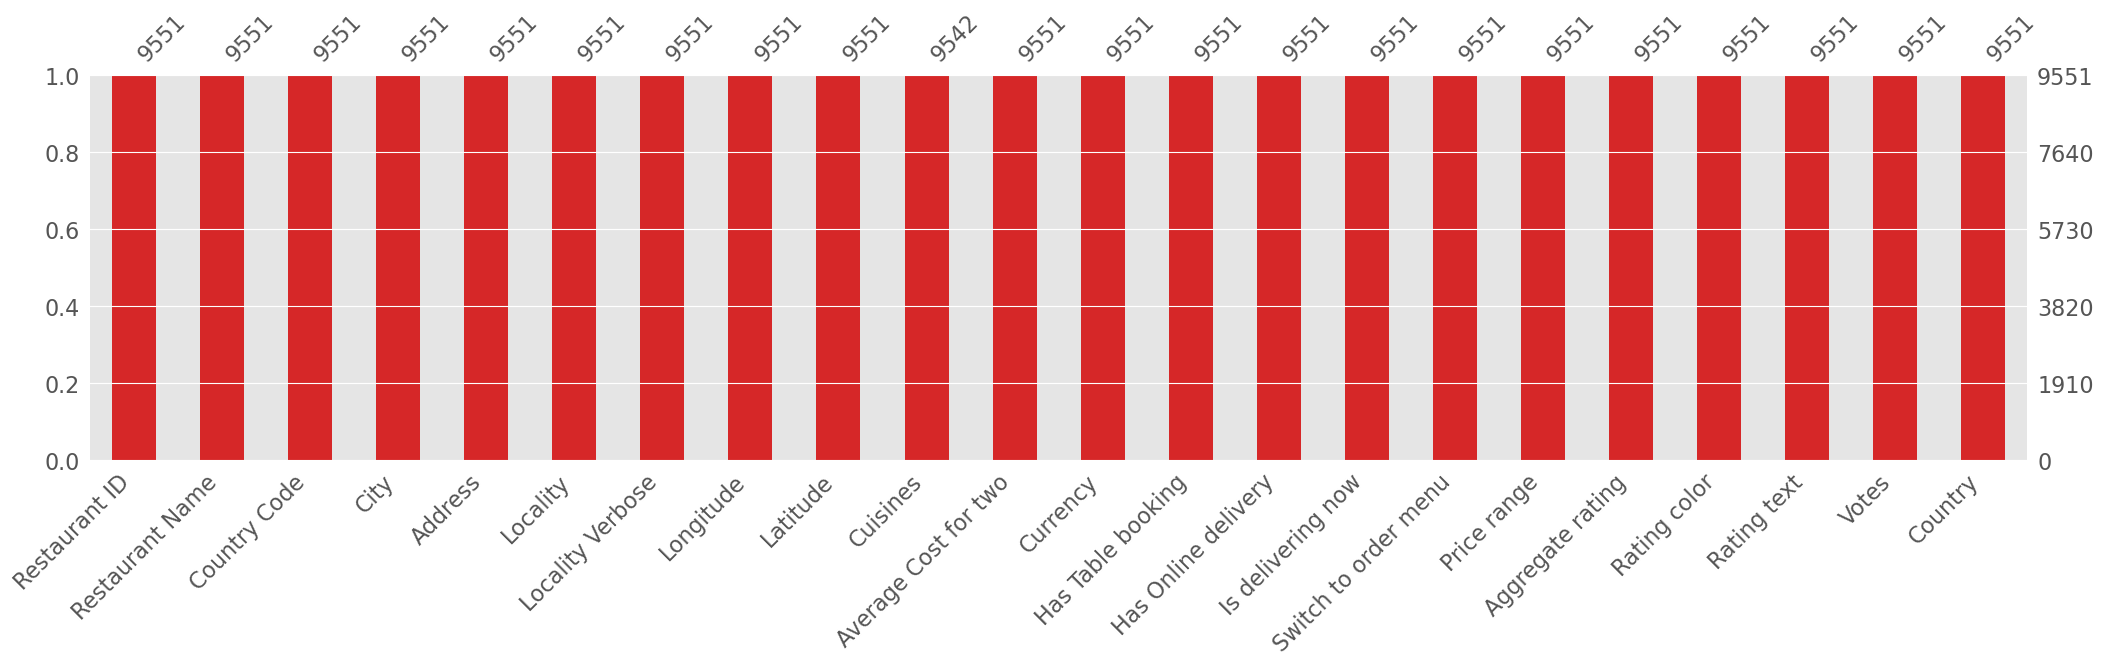

In [120]:
missingno.bar(df, figsize = (25,5), color="tab:red")

In [121]:
# Filling missing values in Cuisines using mode

df["Cuisines"] = df["Cuisines"].fillna(df["Cuisines"].mode()[0])

In [122]:
# Again checking null values
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Now , there is no null value in our dataset.

In [123]:
# checking for duplicate columns
df.duplicated().sum()

0

In [124]:
# Number of unique values
df.nunique().to_frame("Unique Values")

,Unique Values
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


In [125]:
df['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

<span class="burk">Removing Irrelavent Features</span>

In [126]:

#removing Switch to order menu,Restaurant ID and Address containing some value for all columns,they are not relavent

df.drop(columns=["Switch to order menu","Restaurant ID","Address"],axis=1,inplace=True)

In [127]:
df['Is delivering now'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

In [128]:
#removing Is delivering now, Locality ,Locality Verbose,Latitude ,Longitude and Restaurant Name containing some value for all coloumns and they are not relavent
 
df.drop(columns=["Is delivering now","Locality","Locality Verbose","Latitude","Longitude","Restaurant Name"],axis=1,inplace=True)

In [129]:
df['Votes'].value_counts()

0      1094
1       483
2       327
3       244
4       207
       ... 
615       1
538       1
823       1
650       1
901       1
Name: Votes, Length: 1012, dtype: int64

In [130]:
df['Votes'].unique()

array([ 314,  591,  270, ...,  788, 1034,  901], dtype=int64)

In [131]:
df['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [132]:
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [133]:
# getting list of all object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n ",object_datatype)

# getting the list of all numeric data type column names
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n ",number_datatype)

Object Data Type Columns are:
  ['City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Rating color', 'Rating text', 'Country']

Number Data Type Columns are:
  ['Country Code', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [134]:
# Now let us check the unique value again 
df.nunique()

Country Code              15
City                     141
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

<AxesSubplot:>

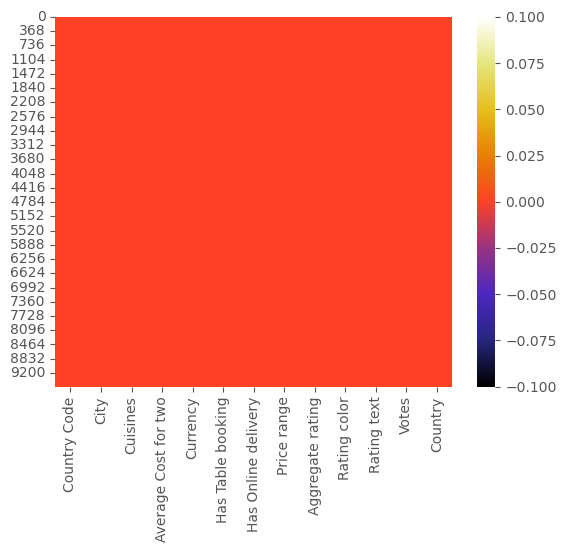

In [135]:
# Now let us visualise the image

sns.heatmap(df.isnull(),cmap="CMRmap")

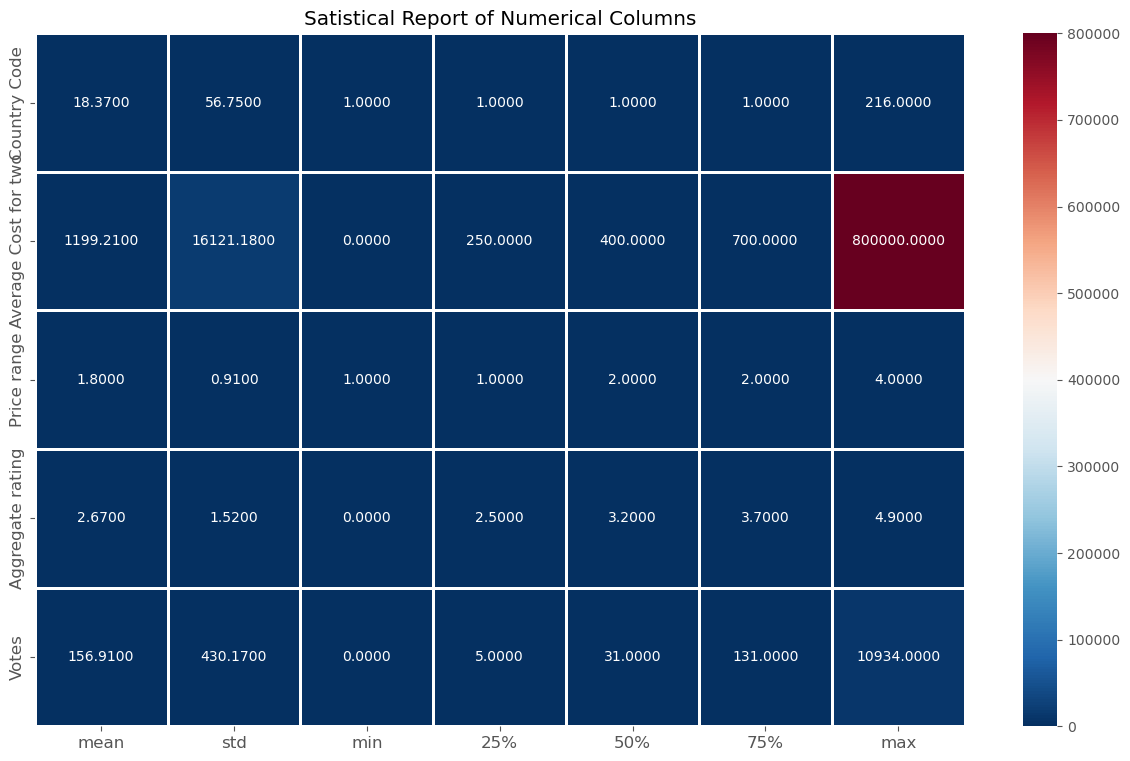

In [136]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (15,9))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="RdBu_r")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [137]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country Code,9551.0,NaN,NaN,NaN,18.365616,56.750546,1.0,1.0,1.0,1.0,216.0
City,9551,141,New Delhi,5473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cuisines,9551,1825,North Indian,945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Cost for two,9551.0,NaN,NaN,NaN,1199.210763,16121.183073,0.0,250.0,400.0,700.0,800000.0
Currency,9551,12,Indian Rupees(Rs.),8652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has Table booking,9551,2,No,8393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has Online delivery,9551,2,No,7100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price range,9551.0,NaN,NaN,NaN,1.804837,0.905609,1.0,1.0,2.0,2.0,4.0
Aggregate rating,9551.0,NaN,NaN,NaN,2.66637,1.516378,0.0,2.5,3.2,3.7,4.9
Rating color,9551,6,Orange,3737,NaN,NaN,NaN,NaN,NaN,NaN,NaN


conclusion: 1.The counts of columns are same which means there are no missing values present in the dataset.

2.The mean is more than the median(50%) in all the columns

3.The country code is same for all ,25%,50%,75% and max, this negtively affect our model.

4.From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.

5.The minimum votes are zero and maximum in 10934.0 and there is huge difference in mean and standard deviation.

In [138]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64
Cuisines
North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Na

In [139]:
#finding categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['City', 'Cuisines', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Rating color', 'Rating text', 'Country'],
      dtype='object')

In [140]:
categorical_columns=(['City', 'Cuisines', 'Currency',
       'Has Online delivery', 'Rating color', 'Rating text', 'Country'])

In [141]:
#finding numerical datas
number_datatype=df.select_dtypes(include=["number"]).columns
number_datatype

Index(['Country Code', 'Average Cost for two', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object')

<span class="burk">VISUALIZATION</span>

Univariate Analysis Plotting

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


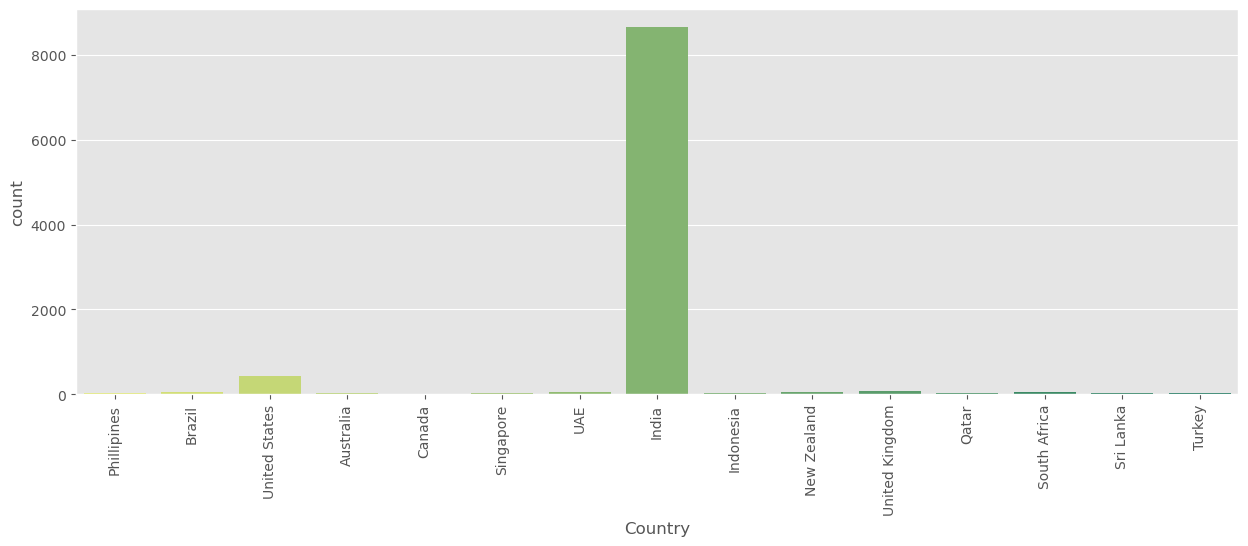

In [142]:
# Visualizing the types 
print(df["Country"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(df["Country"],palette="summer_r")
plt.xticks(rotation=90)
plt.show()

From above, we can identify that India has max. outlets whereas other countries are very low in number.

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


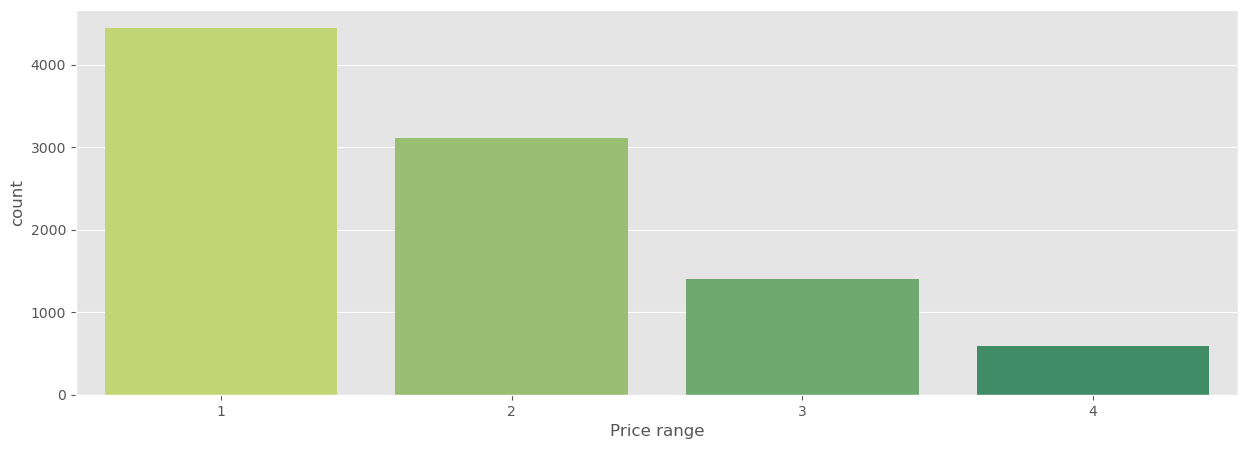

In [143]:
print(df["Price range"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(df["Price range"],palette="summer_r")
plt.show()

From above, we can identify that  max count is 1 and minimum count is 4. 

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(��)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64


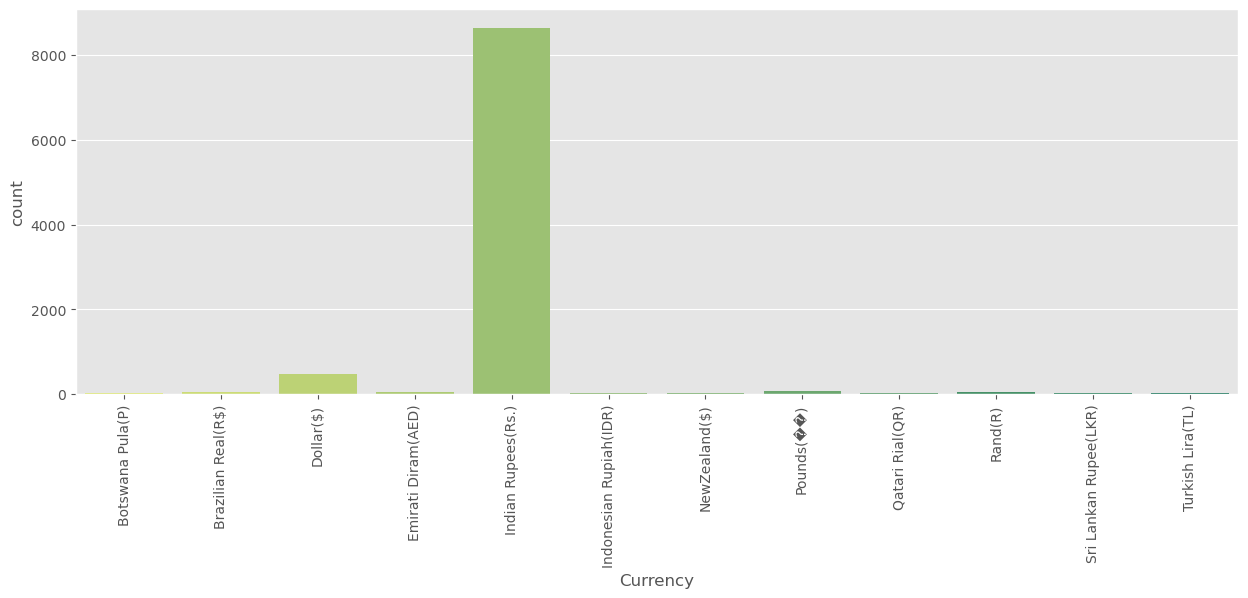

In [144]:
print(df['Currency'].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(df['Currency'],palette="summer_r")
plt.xticks(rotation=90)
plt.show()


currency as Indian rupee is highest followed by dollar.

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64


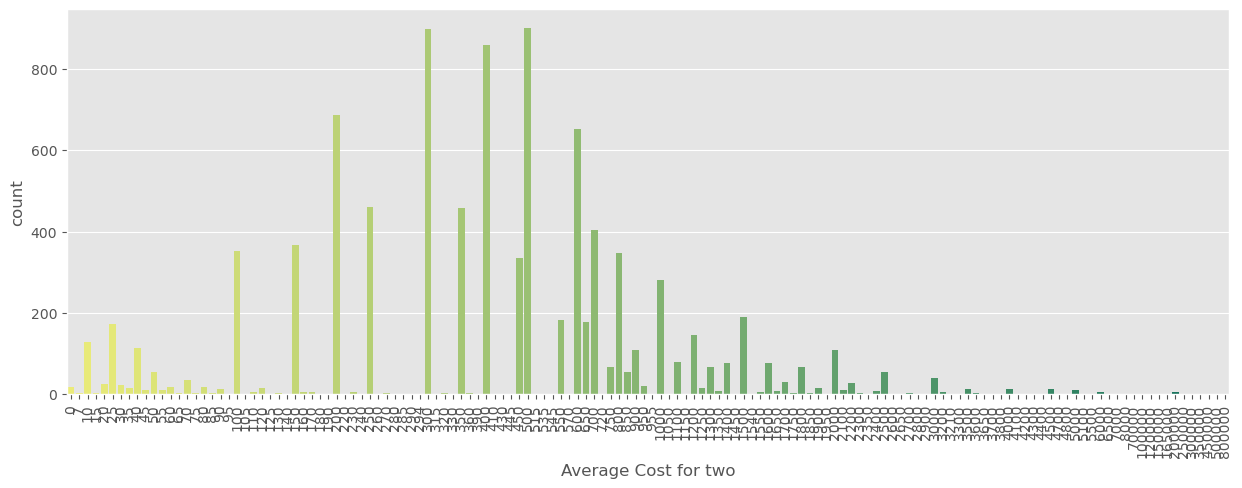

In [145]:
print(df['Average Cost for two'].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(df['Average Cost for two'],palette="summer_r")
plt.xticks(rotation=90)

plt.show()

maximum count for Average cost of two is in between 300-500.

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64


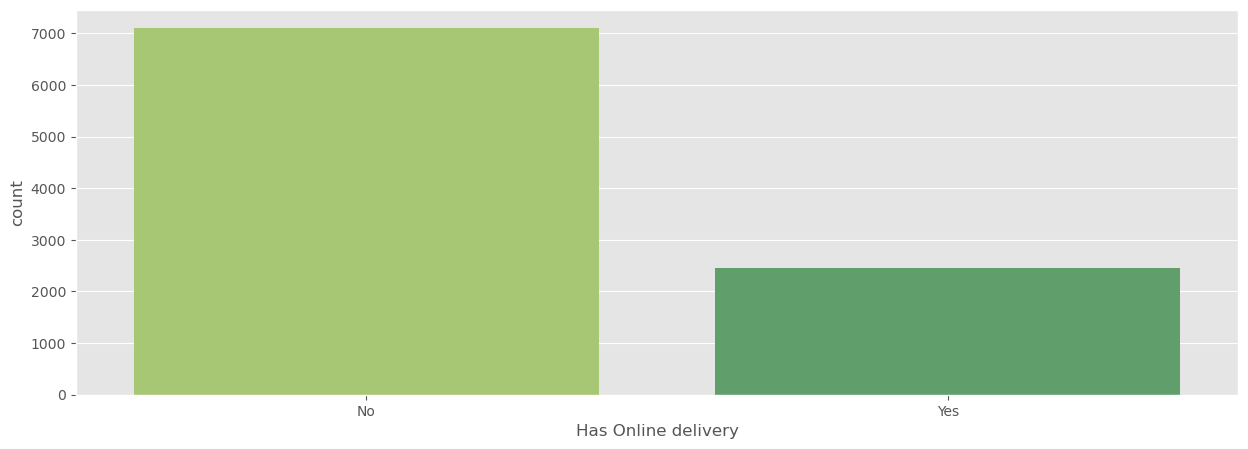

In [146]:
print(df["Has Online delivery"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(df["Has Online delivery"],palette="summer_r")
plt.show()

maximum outlets donot delivered online.only few delivered online

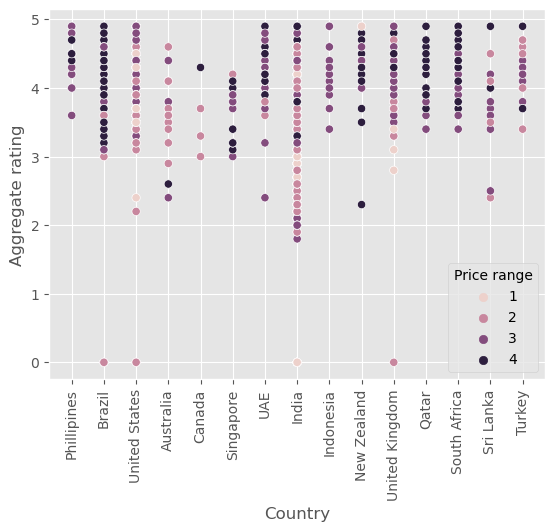

In [147]:
# Bivarient plotting u
plt.style.use('ggplot')
sns.scatterplot(x = "Country", y = "Aggregate rating",hue='Price range', data = df)
plt.xticks(rotation=90)
plt.show()

low aggregate rating is given by India,followed by US.highest aggregate rating is given by Brazil

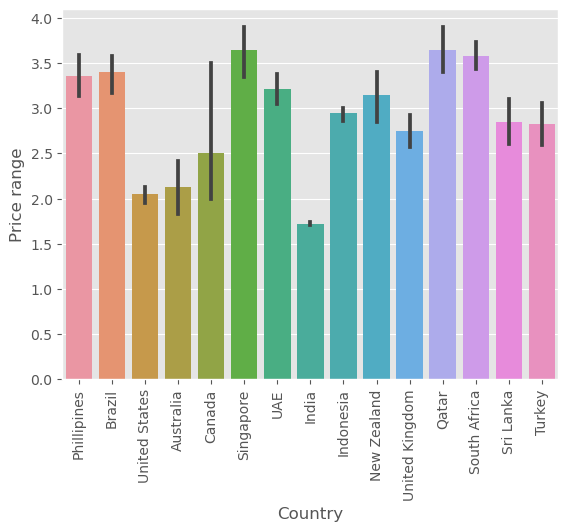

In [148]:
sns.barplot(x='Country',y='Price range',data=df)
plt.xticks(rotation=90)
plt.show()

India has lowest price range followed by US.singapore , qatar and south africa has highest price range.

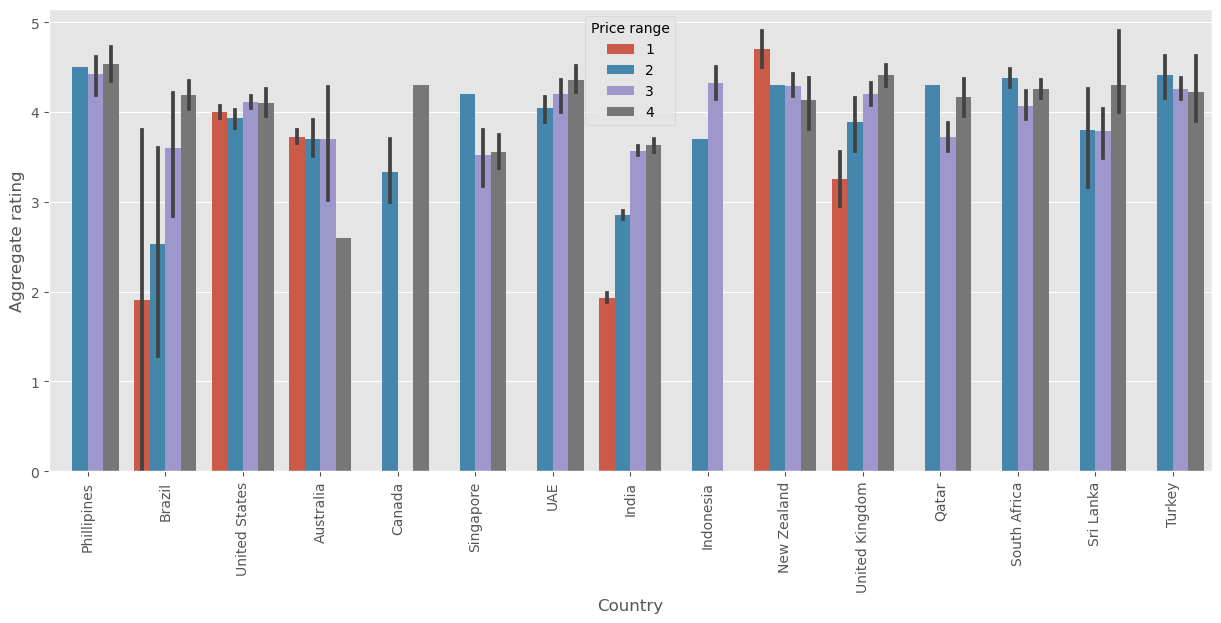

In [149]:
#Lets check the relation between source and capacity_mw

plt.figure(figsize = (15,6))
sns.barplot(x = "Country", y = "Aggregate rating", data = df,hue='Price range')
plt.xticks(rotation=90)
plt.show()

India has given minimum ratings in all price range indexes.

<AxesSubplot:xlabel='Has Online delivery', ylabel='Price range'>

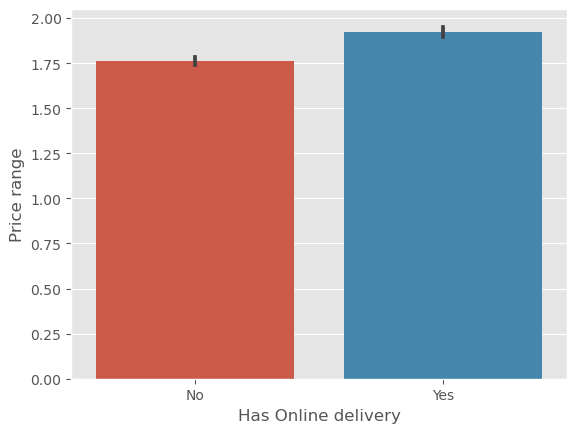

In [150]:
sns.barplot(x='Has Online delivery',y='Price range',data=df)

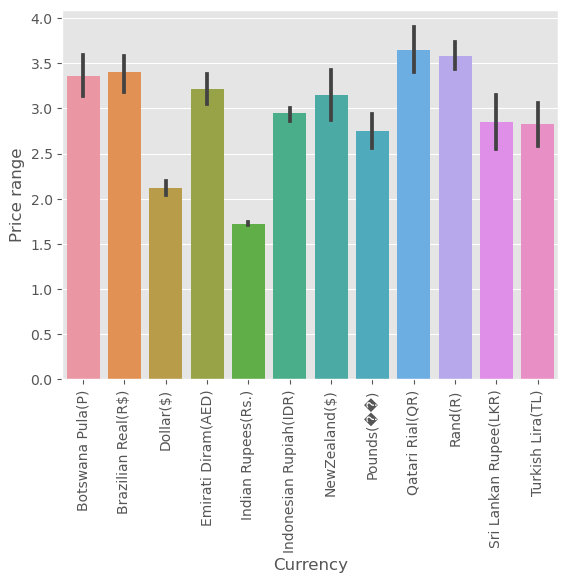

In [151]:
sns.barplot(x='Currency',y='Price range',data=df)
plt.xticks(rotation=90)
plt.show()

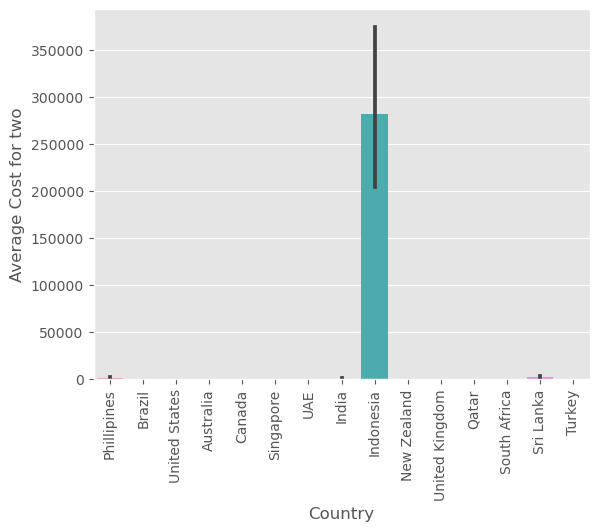

In [152]:
sns.barplot(x='Country',y='Average Cost for two',data=df)
plt.xticks(rotation=90)
plt.show()

Here indonesia is highest followed by sri lanka.

In [153]:
df.columns

Index(['Country Code', 'City', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

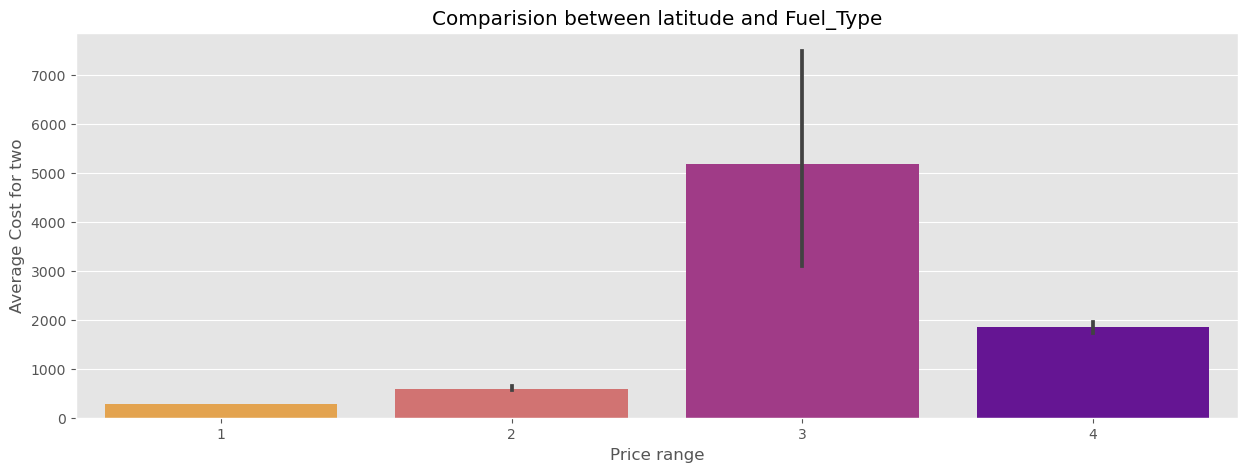

In [154]:
# Let's check how the fuel type is reated to latitude of the power plant
plt.figure(figsize=[15,5])
plt.title('Comparision between latitude and Fuel_Type')
sns.barplot(df['Price range'],df["Average Cost for two"],palette="plasma_r");

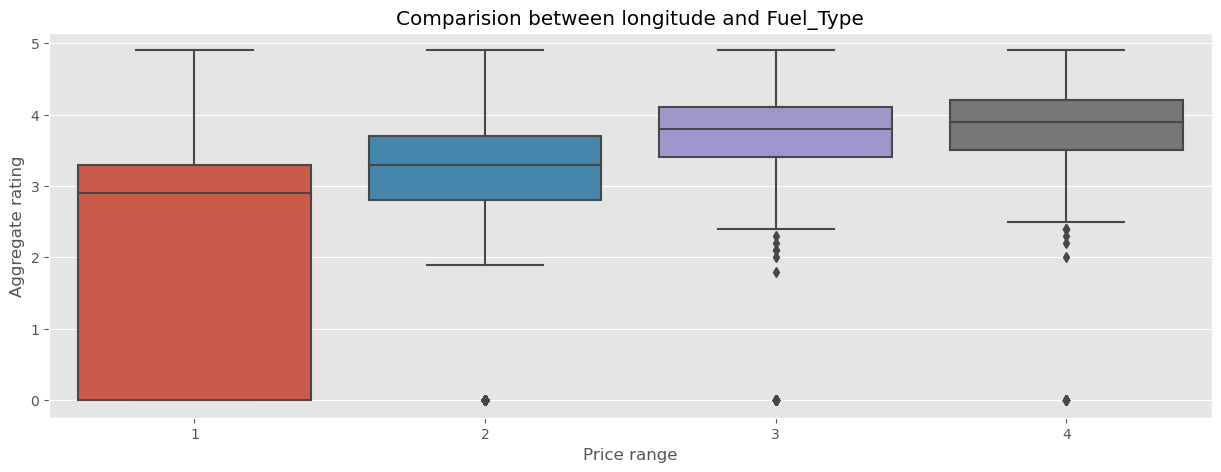

In [155]:
# Let's check how the fuel type is reated to longitude of the power plant
plt.figure(figsize=[15,5])
plt.style.use('ggplot')
plt.title('Comparision between longitude and Fuel_Type')
sns.boxplot(df['Price range'],df["Aggregate rating"]);

We can also see that there are outliers

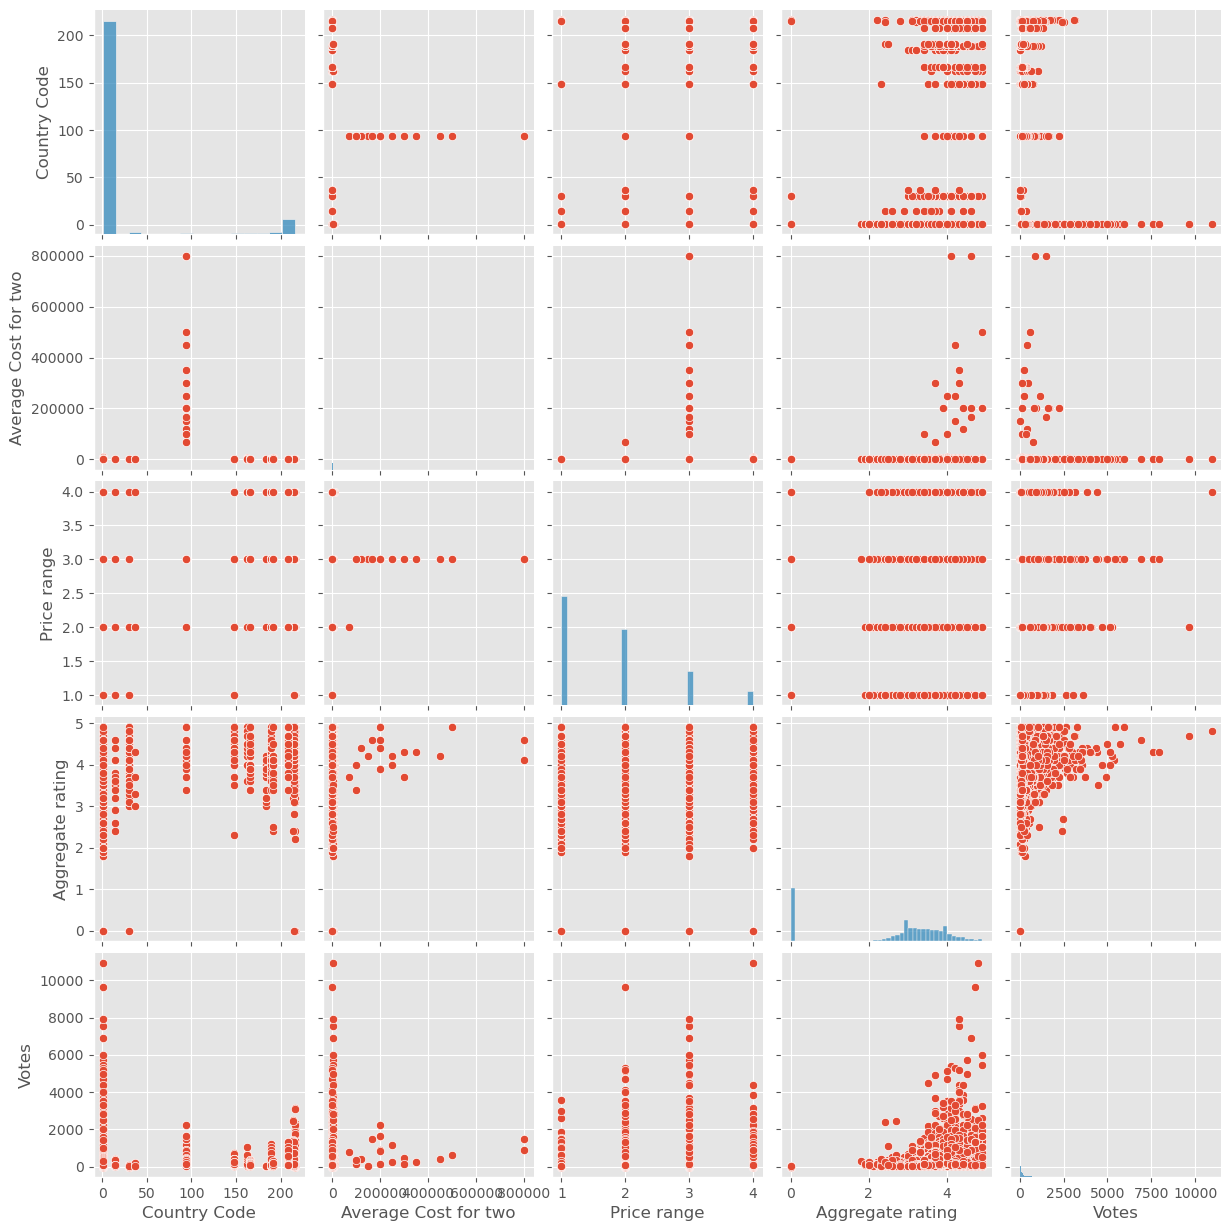

In [156]:
# Checking the pairwise relation between the features.
sns.pairplot(df)

from above pairplot , we conclude that there are linear relationship between few variable, let us check multicollinearity to avoid later problem.

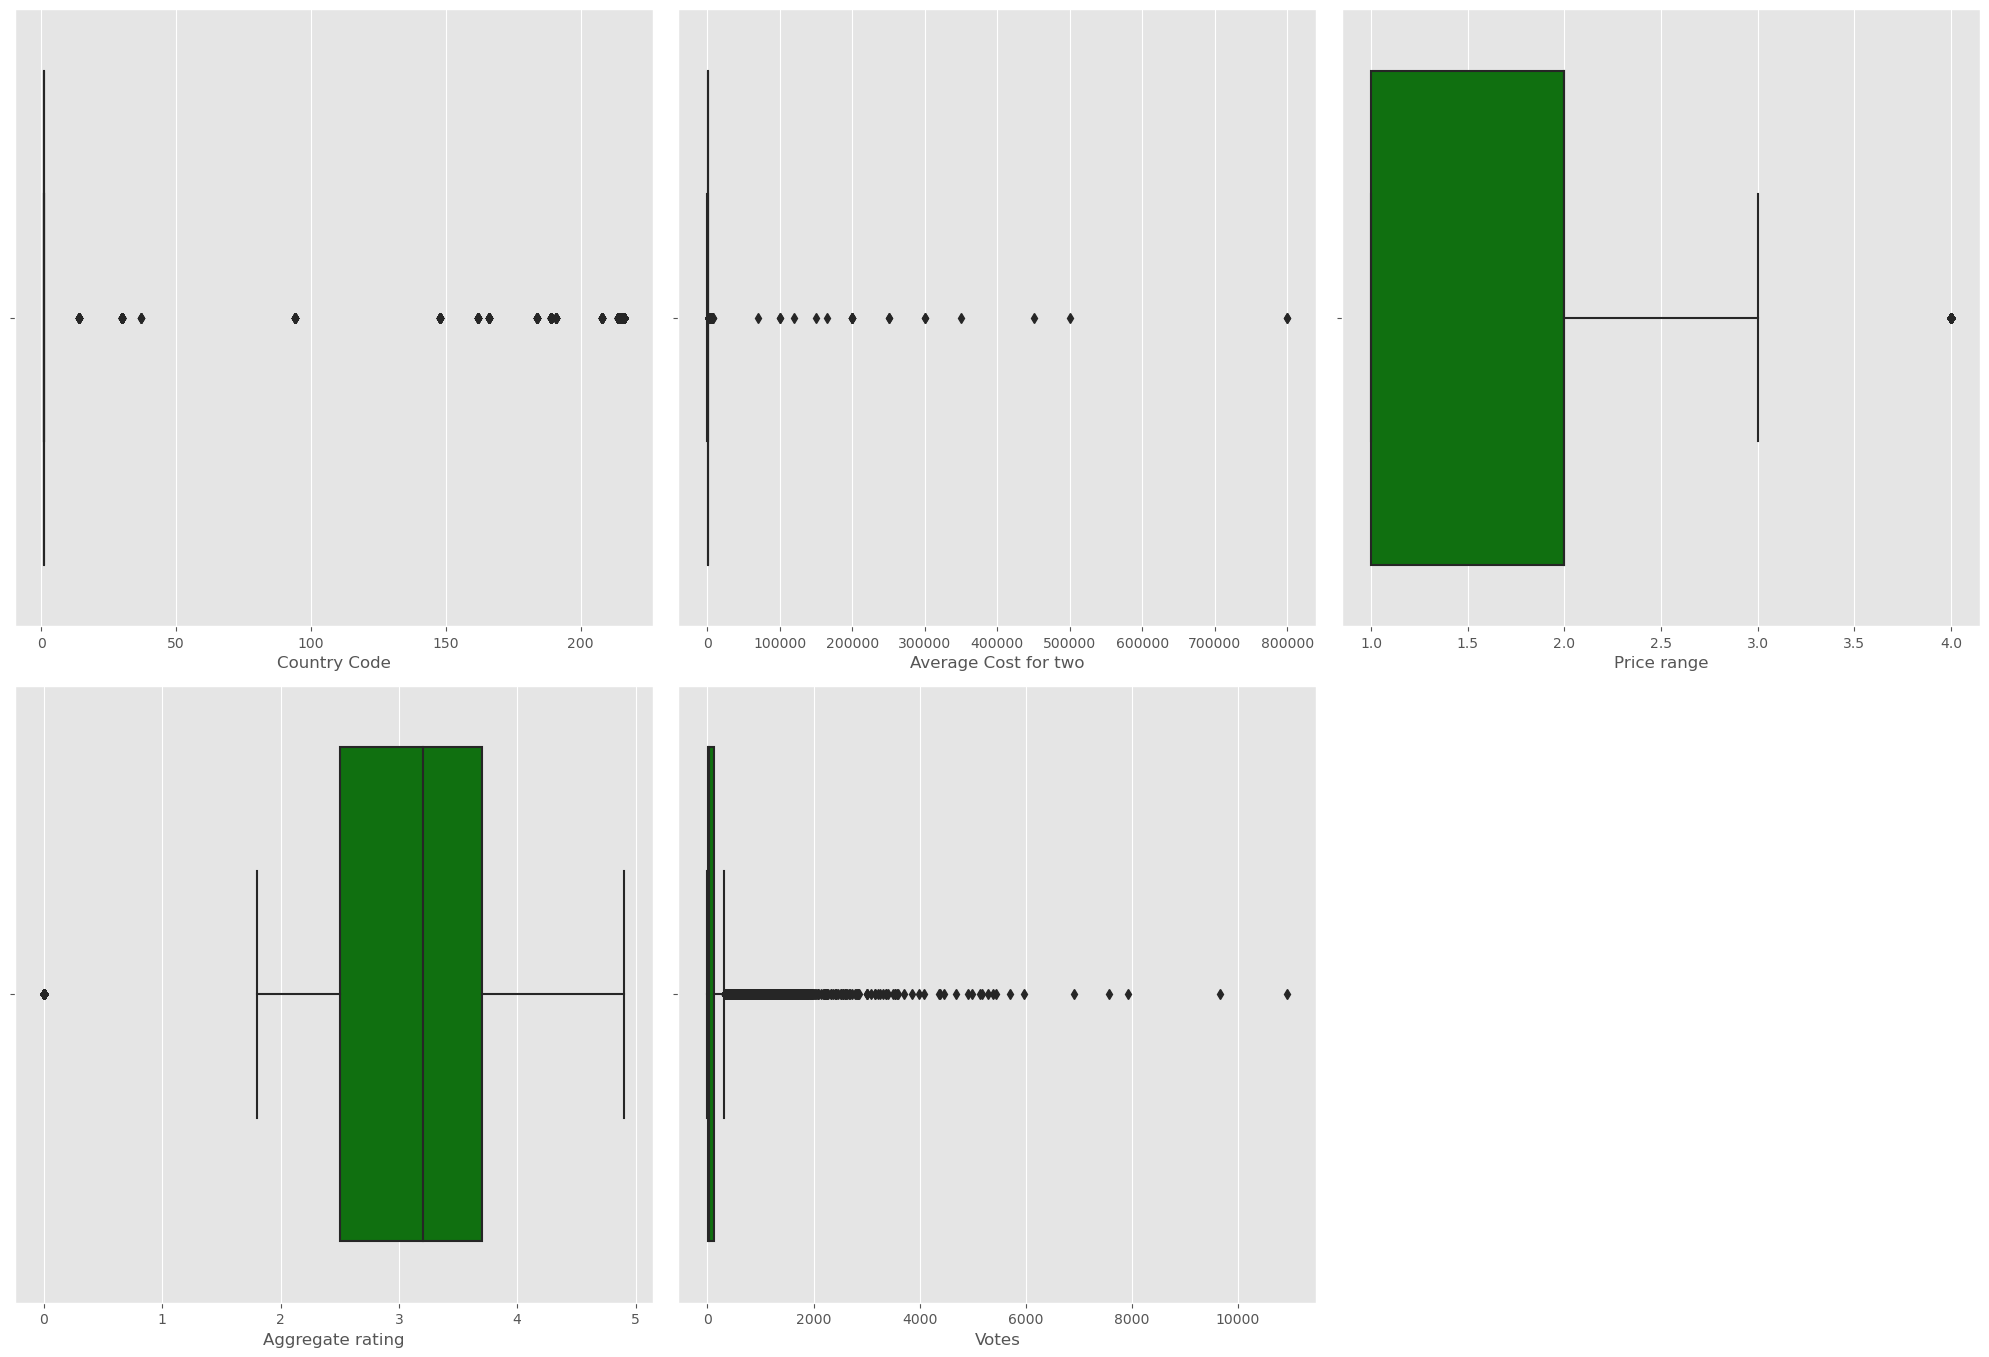

In [157]:
# Identifying the outliers
# Identifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in number_datatype:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="green")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

all features contained outliers except aggregate rating(very less) column and max. outliers are in the votes and average cost of two.


In [158]:
#removing country and Country code, city, votes and cuisines containing some value for all coloumns and they are not relavent

df.drop(columns=['Country Code',"City","Votes",'Cuisines'],axis=1,inplace=True)

In [159]:
# Features containing outliers
features = df[['Average Cost for two', 'Price range',
       'Aggregate rating']]
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Average Cost for two,Price range,Aggregate rating
0,0.006154,1.319803,1.407131
1,0.000049,1.319803,1.209281
2,0.173743,2.424090,1.143331
3,0.018659,2.424090,1.473081
4,0.018659,2.424090,1.407131
...,...,...,...
9546,0.069428,1.319803,0.945480
9547,0.067878,1.319803,1.011430
9548,0.063845,2.424090,0.681680
9549,0.066947,2.424090,0.879530


In [160]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Country
0,1100,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent,Phillipines
1,1200,Botswana Pula(P),Yes,No,3,4.5,Dark Green,Excellent,Phillipines
2,4000,Botswana Pula(P),Yes,No,4,4.4,Green,Very Good,Phillipines
3,1500,Botswana Pula(P),No,No,4,4.9,Dark Green,Excellent,Phillipines
4,1500,Botswana Pula(P),Yes,No,4,4.8,Dark Green,Excellent,Phillipines
...,...,...,...,...,...,...,...,...,...
9546,80,Turkish Lira(TL),No,No,3,4.1,Green,Very Good,Turkey
9547,105,Turkish Lira(TL),No,No,3,4.2,Green,Very Good,Turkey
9548,170,Turkish Lira(TL),No,No,4,3.7,Yellow,Good,Turkey
9549,120,Turkish Lira(TL),No,No,4,4.0,Green,Very Good,Turkey


In [161]:
#check % of data loss
df.shape

(9551, 9)

In [162]:
(9551-9530)/9551*100

0.21987226468432622

using Z-Score, we are losing only .2% of data , that is affordable and we may proceed.

checking outlier using IQR Method

In [163]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

new_df1=df[~((df< (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df1

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Country
0,1100,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent,Phillipines
1,1200,Botswana Pula(P),Yes,No,3,4.5,Dark Green,Excellent,Phillipines
5,1000,Botswana Pula(P),No,No,3,4.4,Green,Very Good,Phillipines
9,1100,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent,Phillipines
10,800,Botswana Pula(P),No,No,3,4.9,Dark Green,Excellent,Phillipines
...,...,...,...,...,...,...,...,...,...
9544,40,Turkish Lira(TL),No,No,2,4.7,Dark Green,Excellent,Turkey
9545,90,Turkish Lira(TL),No,No,3,4.3,Green,Very Good,Turkey
9546,80,Turkish Lira(TL),No,No,3,4.1,Green,Very Good,Turkey
9547,105,Turkish Lira(TL),No,No,3,4.2,Green,Very Good,Turkey


In [164]:
#check the loss of data
(9551-6366)/9551*100

33.34729347712281

33% of data loss is not acceptaple, let us use zscore method so we will proceed with new_df

<span class="burk">Encoding the categorical columns using Label Encoding</span>

In [165]:
categorical_col = ['Currency', 'Has Table booking', 'Has Online delivery', 'Rating color', 'Rating text', 'Country']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,Currency,Has Table booking,Has Online delivery,Rating color,Rating text,Country
0,0,1,0,0,1,5
1,0,1,0,0,1,5
2,0,1,0,1,5,5
3,0,0,0,0,1,5
4,0,1,0,0,1,5
...,...,...,...,...,...,...
9546,10,0,0,1,5,10
9547,10,0,0,1,5,10
9548,10,0,0,5,2,10
9549,10,0,0,1,5,10


<span class="burk">skewness</span>

In [166]:
# Checking the skewness
new_df.skew()

Average Cost for two    3.507449
Currency                1.832391
Has Table booking       2.317265
Has Online delivery     1.111230
Price range             0.897088
Aggregate rating       -0.953130
Rating color            0.046214
Rating text             0.431325
Country                 3.347274
dtype: float64

In [167]:
df.columns

Index(['Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Country'],
      dtype='object')

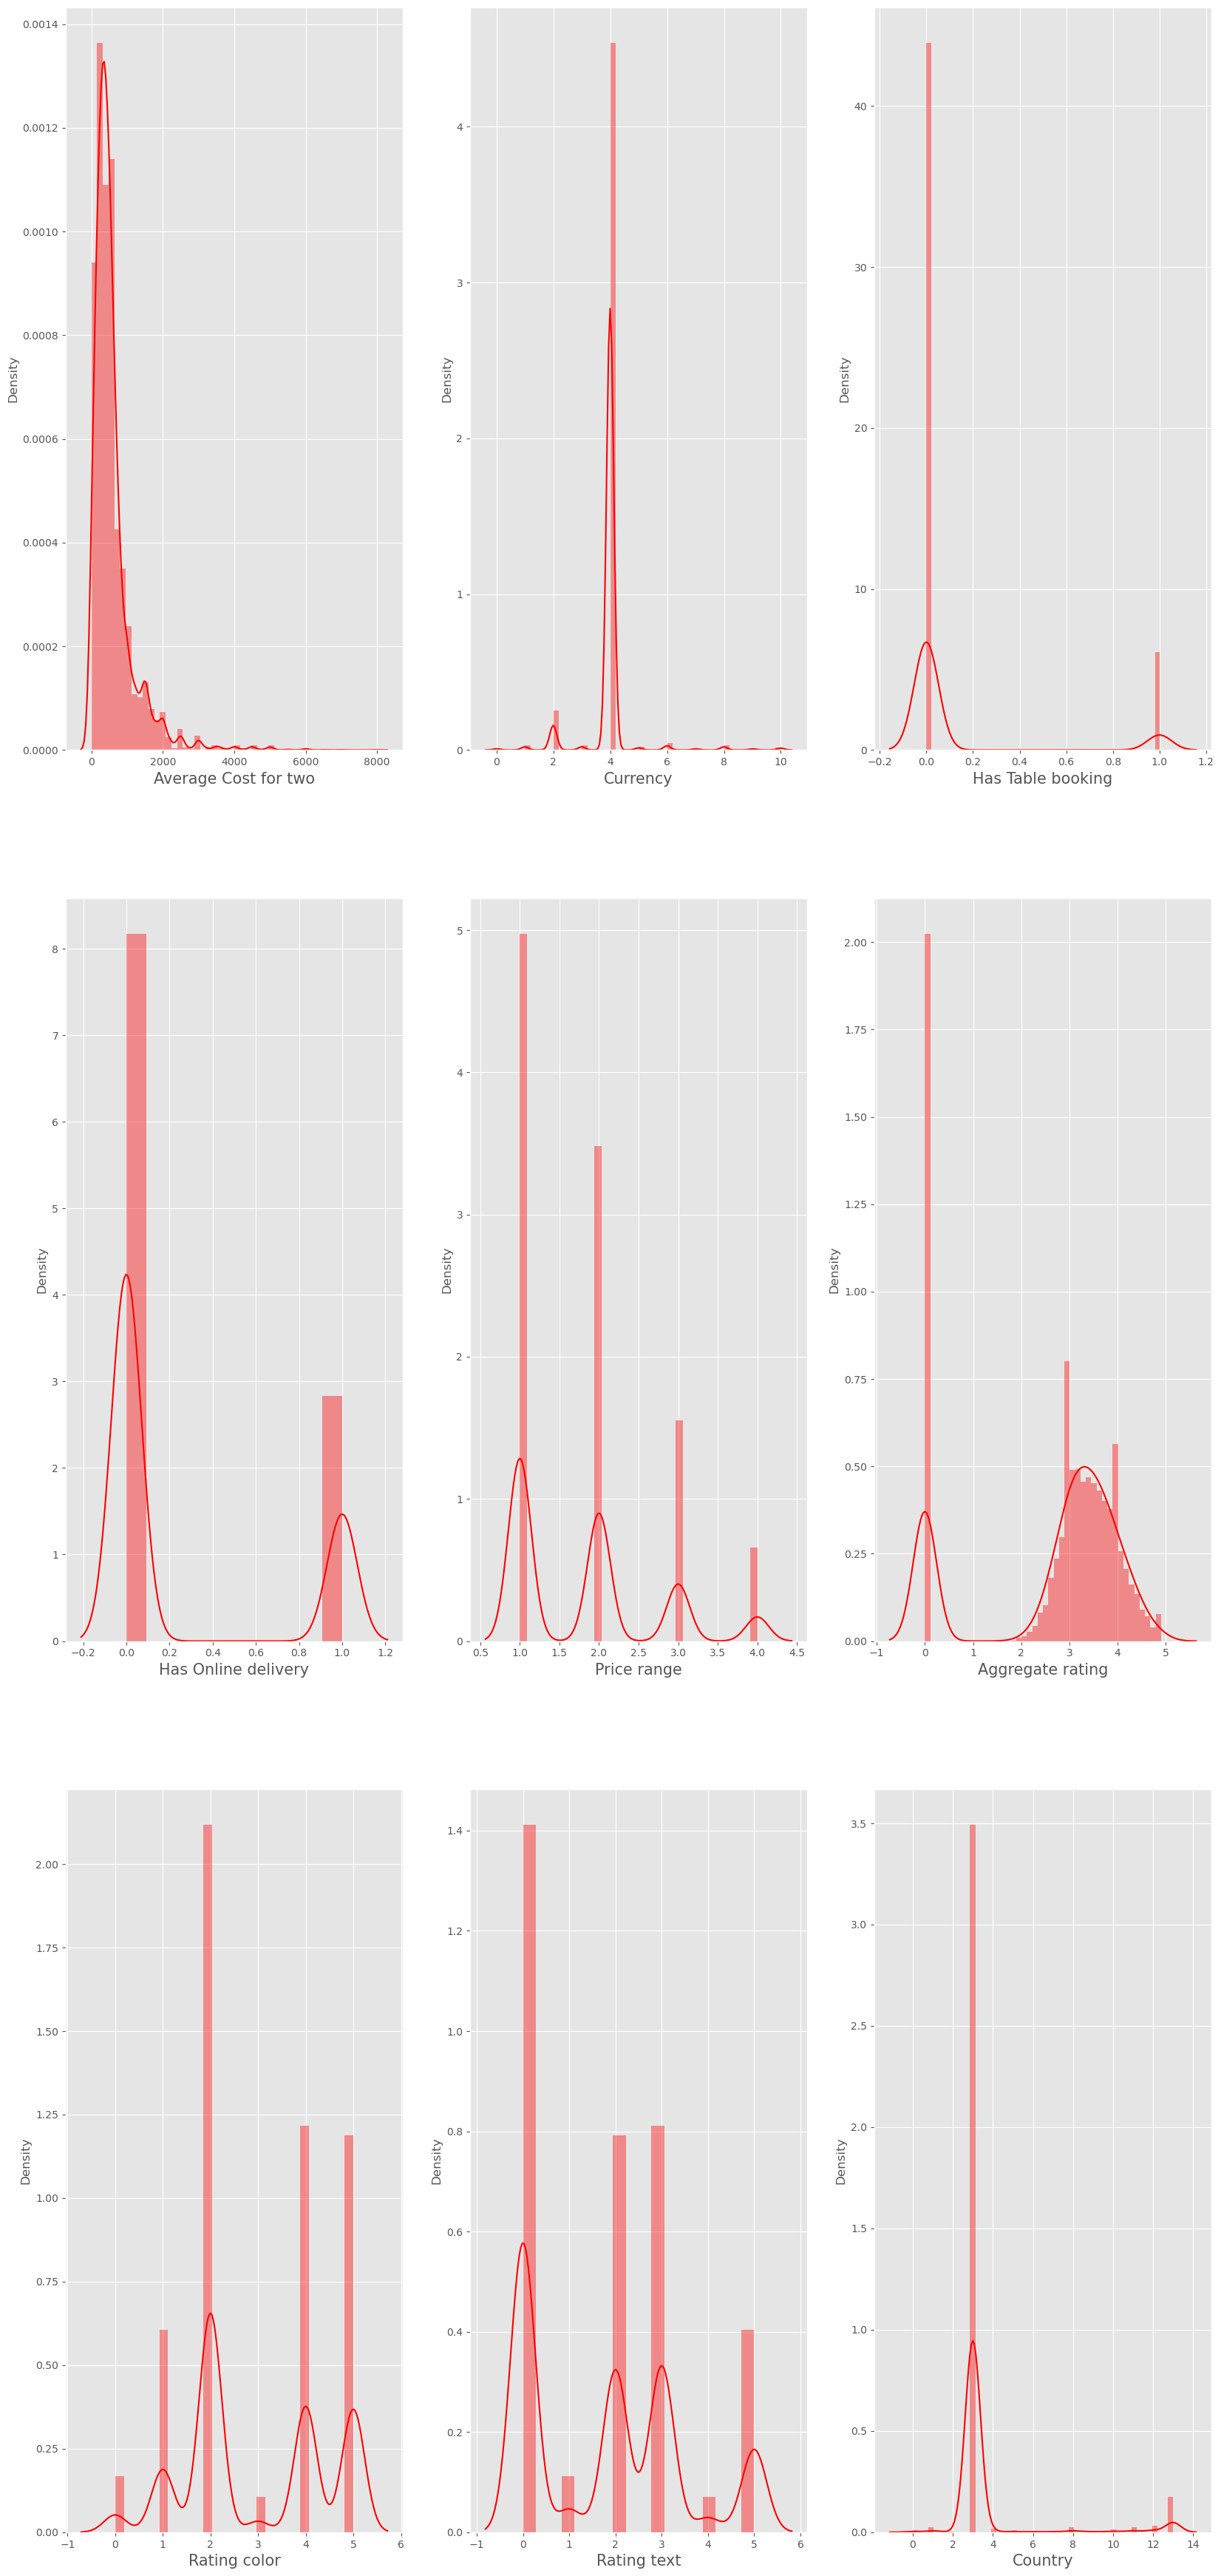

In [168]:

#let plot skewness using distplot


feat=new_df[['Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text','Country']]
#Relationship Visualizing

plt.figure(figsize = (20,60))
plotnumber = 1

for column in feat:
    if plotnumber <= 10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(feat[column], color = 'r')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

High skewness is present in many fields as we seen in skew() function

In [169]:
sk_features=['Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery',
       'Aggregate rating', 'Rating color', 'Rating text','Country']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
new_df[sk_features] = scaler.fit_transform(new_df[sk_features].values)
new_df[sk_features].head()

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Aggregate rating,Rating color,Rating text,Country
0,1.117203,-5.823668,2.688811,-0.588418,1.837778,-2.217775,-0.222848,1.200329
1,1.233533,-5.823668,2.688811,-0.588418,1.510366,-2.217775,-0.222848,1.200329
2,3.120772,-5.823668,2.688811,-0.588418,1.404186,-1.350509,1.504535,1.200329
3,1.543270,-5.823668,-0.371912,-0.588418,1.949853,-2.217775,-0.222848,1.200329
4,1.543270,-5.823668,2.688811,-0.588418,1.837778,-2.217775,-0.222848,1.200329


Skewness has been reduced using powertranformer and let us plot the same.

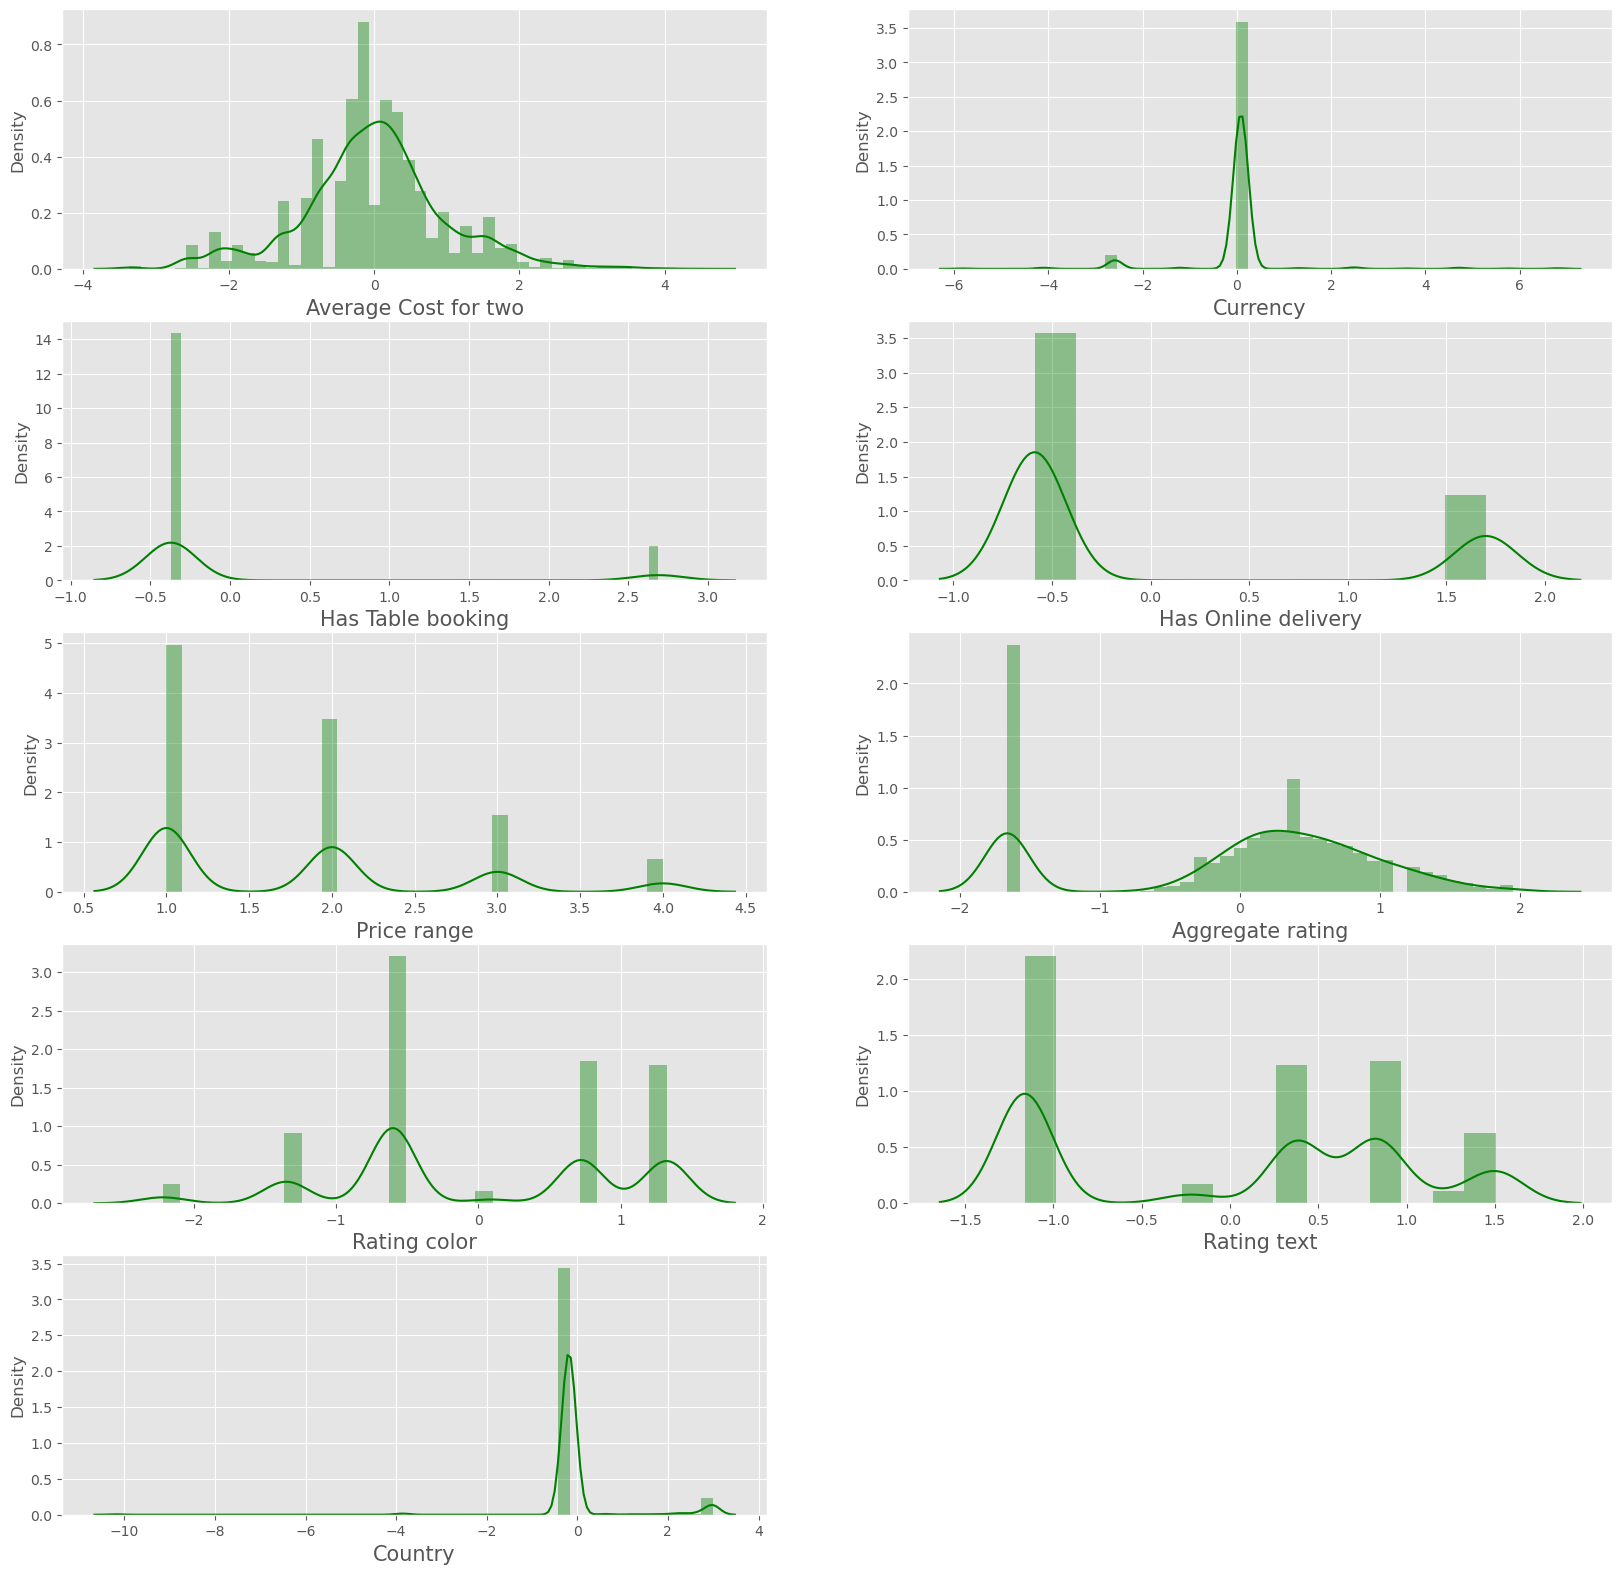

In [170]:
plt.figure(figsize = (20,60))
plotnumber = 1

for column in feat:
    if plotnumber <= 10:
        ax = plt.subplot(15,2,plotnumber)
        sns.distplot(new_df[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

skewness is present in few fields but in very less quantity

<span class="burk">Correlation between the target variable and features using HEAT map</span>

In [171]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Country
Average Cost for two,1.000000,0.244485,0.526449,0.223355,0.577204,0.164751,0.012243,-0.053029,-0.316695
Currency,0.244485,1.000000,0.011108,0.041611,0.011917,-0.072289,0.008642,-0.033013,-0.013836
Has Table booking,0.526449,0.011108,1.000000,0.100797,0.503962,0.196030,-0.028889,0.037742,-0.031957
Has Online delivery,0.223355,0.041611,0.100797,1.000000,0.079735,0.205727,0.009011,-0.083612,-0.089628
Price range,0.577204,0.011917,0.503962,0.079735,1.000000,0.466743,-0.159252,0.144166,0.119549
Aggregate rating,0.164751,-0.072289,0.196030,0.205727,0.466743,1.000000,-0.390902,-0.136652,0.213701
Rating color,0.012243,0.008642,-0.028889,0.009011,-0.159252,-0.390902,1.000000,0.307829,-0.140008
Rating text,-0.053029,-0.033013,0.037742,-0.083612,0.144166,-0.136652,0.307829,1.000000,0.139308
Country,-0.316695,-0.013836,-0.031957,-0.089628,0.119549,0.213701,-0.140008,0.139308,1.000000


This gives the correlation between the dependent and independent variables. We can visualize this by plotting throuh heat map.

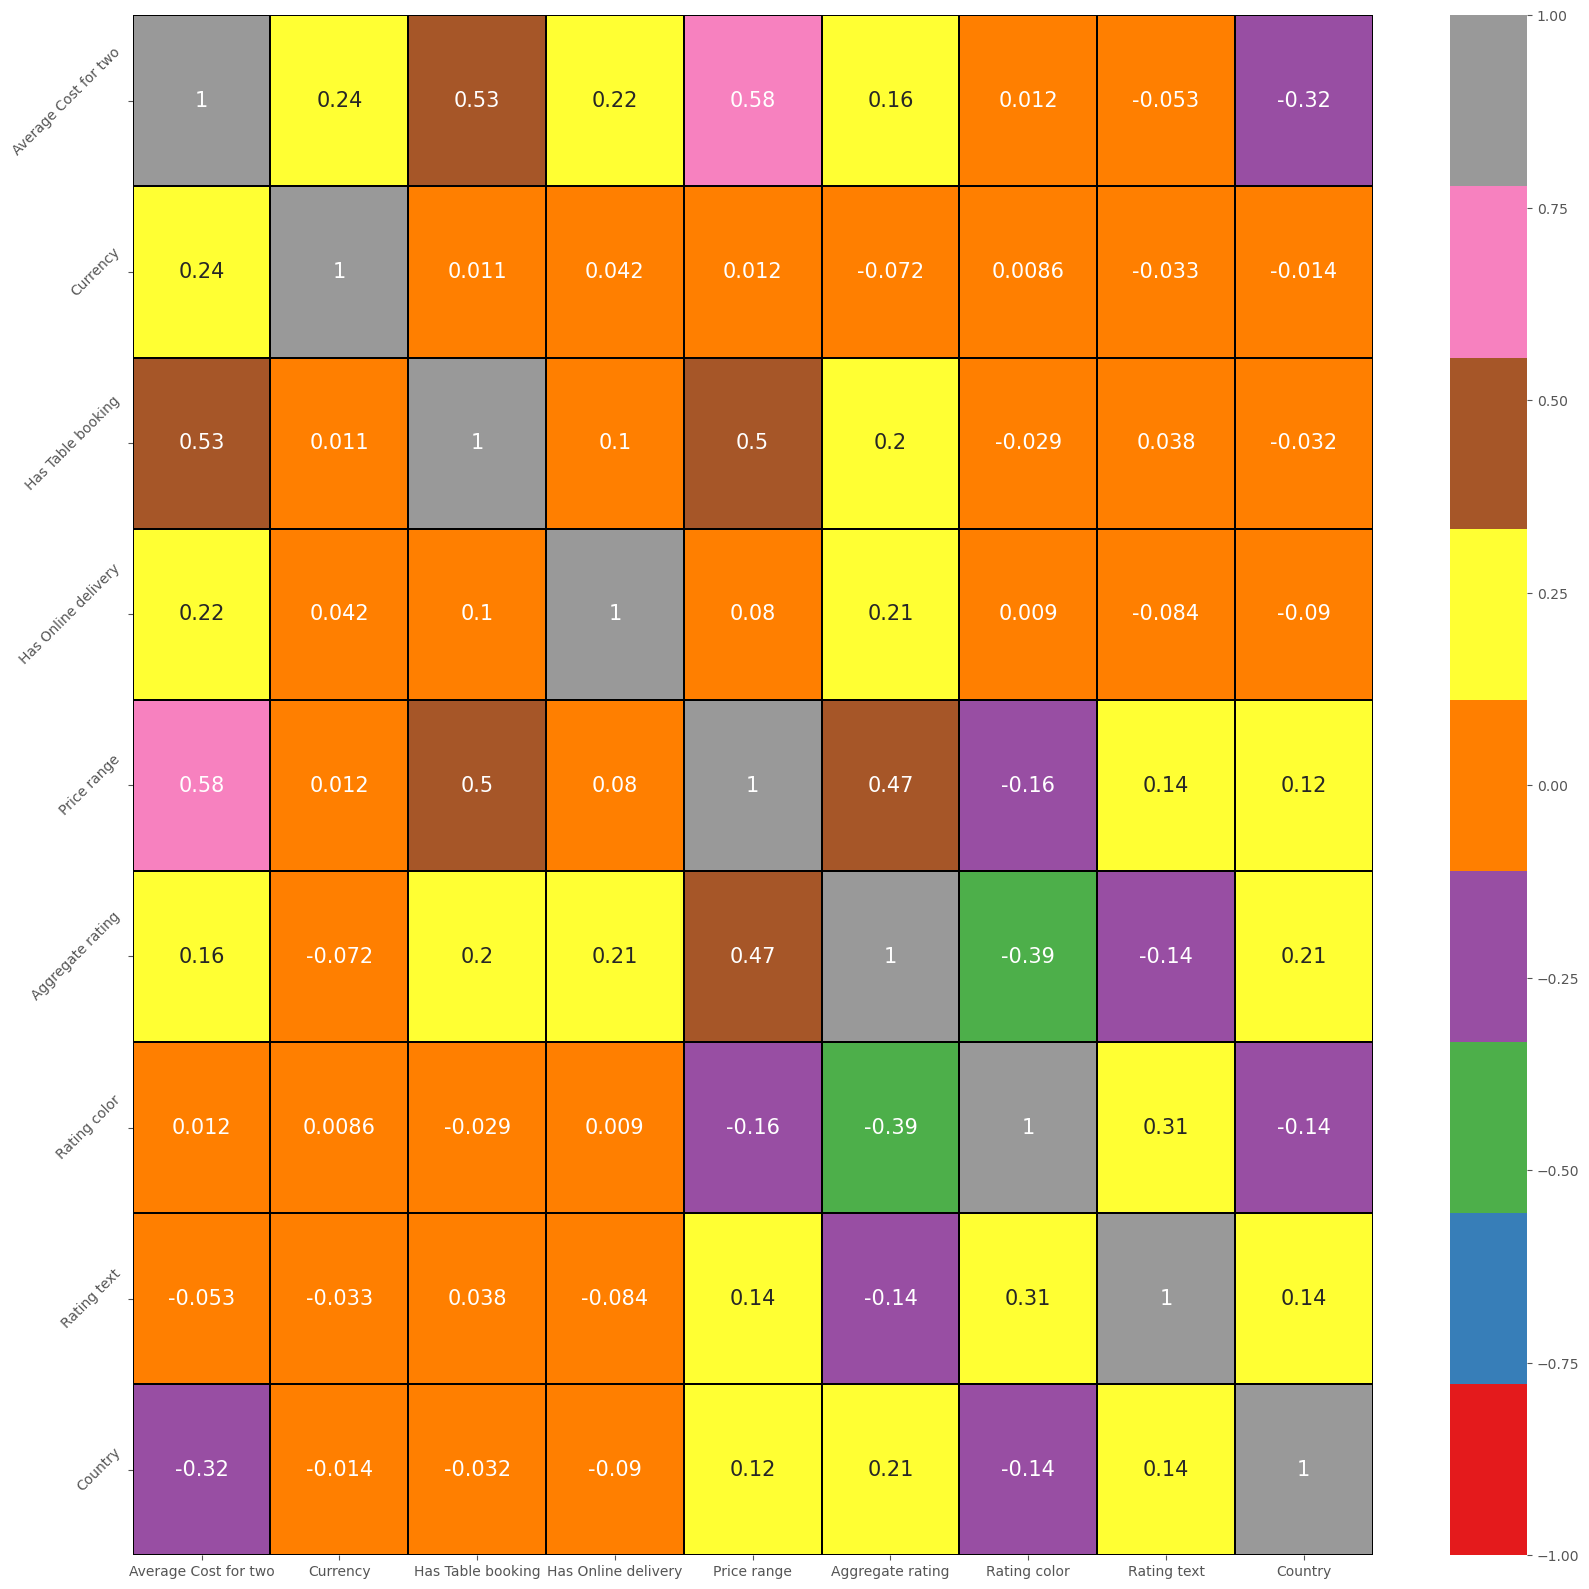

In [172]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="Set1")
plt.yticks(rotation=45);

1.The price range is highly positively correlated with the Average cost of two.

2.Rating colour, Rating text,has table booking  and Has online delivery is negatively correlated with the rating colour, country, aggregate rating.


In [173]:
#Let us save one Data Frame for regression problem
Classif_data=new_df

In [174]:
new_df.skew()

Average Cost for two    0.076679
Currency                0.654209
Has Table booking       2.317265
Has Online delivery     1.111230
Price range             0.897088
Aggregate rating       -0.611961
Rating color           -0.103331
Rating text            -0.059698
Country                -1.274521
dtype: float64

seperating Label and Features:

In [175]:
x=new_df.drop('Average Cost for two',axis=1)
y=new_df['Average Cost for two']
x.head()

,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Country
0,-5.823668,2.688811,-0.588418,3,1.837778,-2.217775,-0.222848,1.200329
1,-5.823668,2.688811,-0.588418,3,1.510366,-2.217775,-0.222848,1.200329
2,-5.823668,2.688811,-0.588418,4,1.404186,-1.350509,1.504535,1.200329
3,-5.823668,-0.371912,-0.588418,4,1.949853,-2.217775,-0.222848,1.200329
4,-5.823668,2.688811,-0.588418,4,1.837778,-2.217775,-0.222848,1.200329


In [176]:
x.shape

(9530, 8)

In [177]:
y.shape

(9530,)

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Country
0,-5.823668,2.688811,-0.588418,1.323565,1.837778,-2.217775,-0.222848,1.200329
1,-5.823668,2.688811,-0.588418,1.323565,1.510366,-2.217775,-0.222848,1.200329
2,-5.823668,2.688811,-0.588418,2.428662,1.404186,-1.350509,1.504535,1.200329
3,-5.823668,-0.371912,-0.588418,2.428662,1.949853,-2.217775,-0.222848,1.200329
4,-5.823668,2.688811,-0.588418,2.428662,1.837778,-2.217775,-0.222848,1.200329
...,...,...,...,...,...,...,...,...
9525,6.811843,-0.371912,-0.588418,1.323565,1.094612,-1.350509,1.504535,2.602052
9526,6.811843,-0.371912,-0.588418,1.323565,1.196303,-1.350509,1.504535,2.602052
9527,6.811843,-0.371912,-0.588418,2.428662,0.703019,1.323367,0.378592,2.602052
9528,6.811843,-0.371912,-0.588418,2.428662,0.994431,-1.350509,1.504535,2.602052


we have scaled the data using standard scalarizaion method to overcome with the issue of data biasness. As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns.

<span class="burk">Checking VIF(Variance Inflation Factor) values:</span>

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.014969,Currency
1,1.368632,Has Table booking
2,1.086452,Has Online delivery
3,1.764448,Price range
4,1.641687,Aggregate rating
5,1.318144,Rating color
6,1.231328,Rating text
7,1.119418,Country


we can observe that all the columns have VIF less than 10.

<span class="burk">MODEL BUILDING:</span>

searching for best random state

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8953215695317613  on Random_state  171


In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

<span class="burk">Importing Regression Algorithms:</span>

In [182]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

Random Forest Regressor

In [183]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',mean_absolute_error(y_test, predRFR))
print('MSE:',mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFR)))
# Checking cv score 
print(cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.8957065484872566
MAE: 0.24584428519043008
MSE: 0.10510456095661243
RMSE: 0.32419833583257707
0.6110092717441562


Decision Tree Regressor

In [184]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',mean_absolute_error(y_test, predDTR))
print('MSE:',mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predDTR)))
# Checking cv score 
print(cross_val_score(DTR,x,y,cv=5).mean())

R2_Score: 0.8923953756626007
MAE: 0.24824385636270133
MSE: 0.10844148538416759
RMSE: 0.32930454807695503
0.563062767413715


Stochastic KNN Regressor

In [185]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))
# Checking cv score 
print(cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.8738917632796811
MAE: 0.2607187987676236
MSE: 0.12708900377970636
RMSE: 0.35649544706728914
0.4273557804771969


GradientBoosting Regressor

In [186]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))
# Checking cv score 

print(cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.8975894003094043
MAE: 0.24704411380256772
MSE: 0.10320706584792855
RMSE: 0.3212585654078791
0.5940781518025453


Bagging Regressor

From above observation, we come to conclusion that the difference between R2 score and the cross validation score we conclude that GradientBoosting Regressor as our best fitting model. Let's increse the accuracy of the model by using hyper parameter tuning.

<span class="burk">HYPERPARAMETR TUNING</span>

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
parameters={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
           'max_features' : ['auto', 'sqrt', 'log2'],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'], 
          
          }
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [189]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [190]:
GCV.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_features': 'log2'}

In [198]:
ACOT_model = GradientBoostingRegressor(criterion='squared_error', learning_rate= 0.2, loss= 'squared_error',max_features= 'log2')
ACOT_model.fit(x_train, y_train)
pred = ACOT_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.32419833583257707
R2_Score: 89.87652091411483


<span class="burk">Saving the model:</span>

In [200]:
# Saving the model using .pkl
import joblib
joblib.dump(ACOT_model,"Zomato.pkl")

['Zomato.pkl']

<span class="burk">loading the model</span>

In [202]:
# Loading the saved model
model=joblib.load("Zomato.pkl")

#Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,0.371220,0.390301
1,-0.070128,-0.448569
2,0.167394,0.368416
3,0.992548,1.487835
4,0.167394,0.326915
...,...,...
2854,-0.974047,-0.448569
2855,-0.730948,-0.556024
2856,0.371220,0.359044
2857,-0.070128,-0.556024


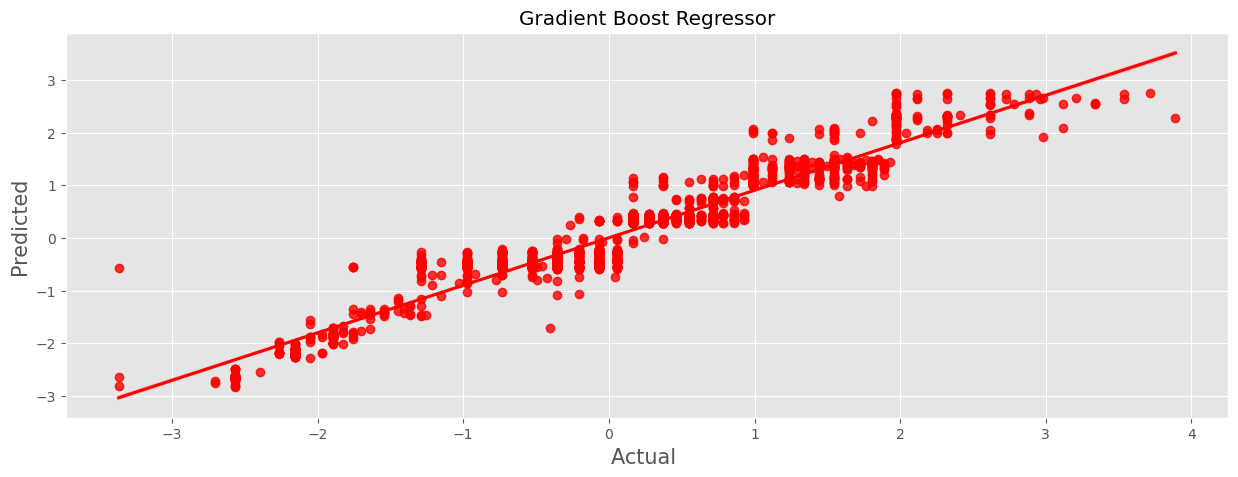

In [203]:
plt.figure(figsize=(15,5))
sns.regplot(y_test,prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Gradient Boost Regressor")
plt.show()

 <span class="burk">MODEL 2</span> : Price Range is target variable  . Let us Do the Classification

we have already saved our data set after removing skewness

In [204]:
Classif_data.head()

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Country
0,1.117203,-5.823668,2.688811,-0.588418,3,1.837778,-2.217775,-0.222848,1.200329
1,1.233533,-5.823668,2.688811,-0.588418,3,1.510366,-2.217775,-0.222848,1.200329
2,3.120772,-5.823668,2.688811,-0.588418,4,1.404186,-1.350509,1.504535,1.200329
3,1.543270,-5.823668,-0.371912,-0.588418,4,1.949853,-2.217775,-0.222848,1.200329
4,1.543270,-5.823668,2.688811,-0.588418,4,1.837778,-2.217775,-0.222848,1.200329


In [205]:
#now let us plot correlation and heatmap so that we can move forward
Classif_data.corr()

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Country
Average Cost for two,1.000000,0.244485,0.526449,0.223355,0.577204,0.164751,0.012243,-0.053029,-0.316695
Currency,0.244485,1.000000,0.011108,0.041611,0.011917,-0.072289,0.008642,-0.033013,-0.013836
Has Table booking,0.526449,0.011108,1.000000,0.100797,0.503962,0.196030,-0.028889,0.037742,-0.031957
Has Online delivery,0.223355,0.041611,0.100797,1.000000,0.079735,0.205727,0.009011,-0.083612,-0.089628
Price range,0.577204,0.011917,0.503962,0.079735,1.000000,0.466743,-0.159252,0.144166,0.119549
Aggregate rating,0.164751,-0.072289,0.196030,0.205727,0.466743,1.000000,-0.390902,-0.136652,0.213701
Rating color,0.012243,0.008642,-0.028889,0.009011,-0.159252,-0.390902,1.000000,0.307829,-0.140008
Rating text,-0.053029,-0.033013,0.037742,-0.083612,0.144166,-0.136652,0.307829,1.000000,0.139308
Country,-0.316695,-0.013836,-0.031957,-0.089628,0.119549,0.213701,-0.140008,0.139308,1.000000


we found earlier data contains both positevily and negatevily co-related data

<AxesSubplot:>

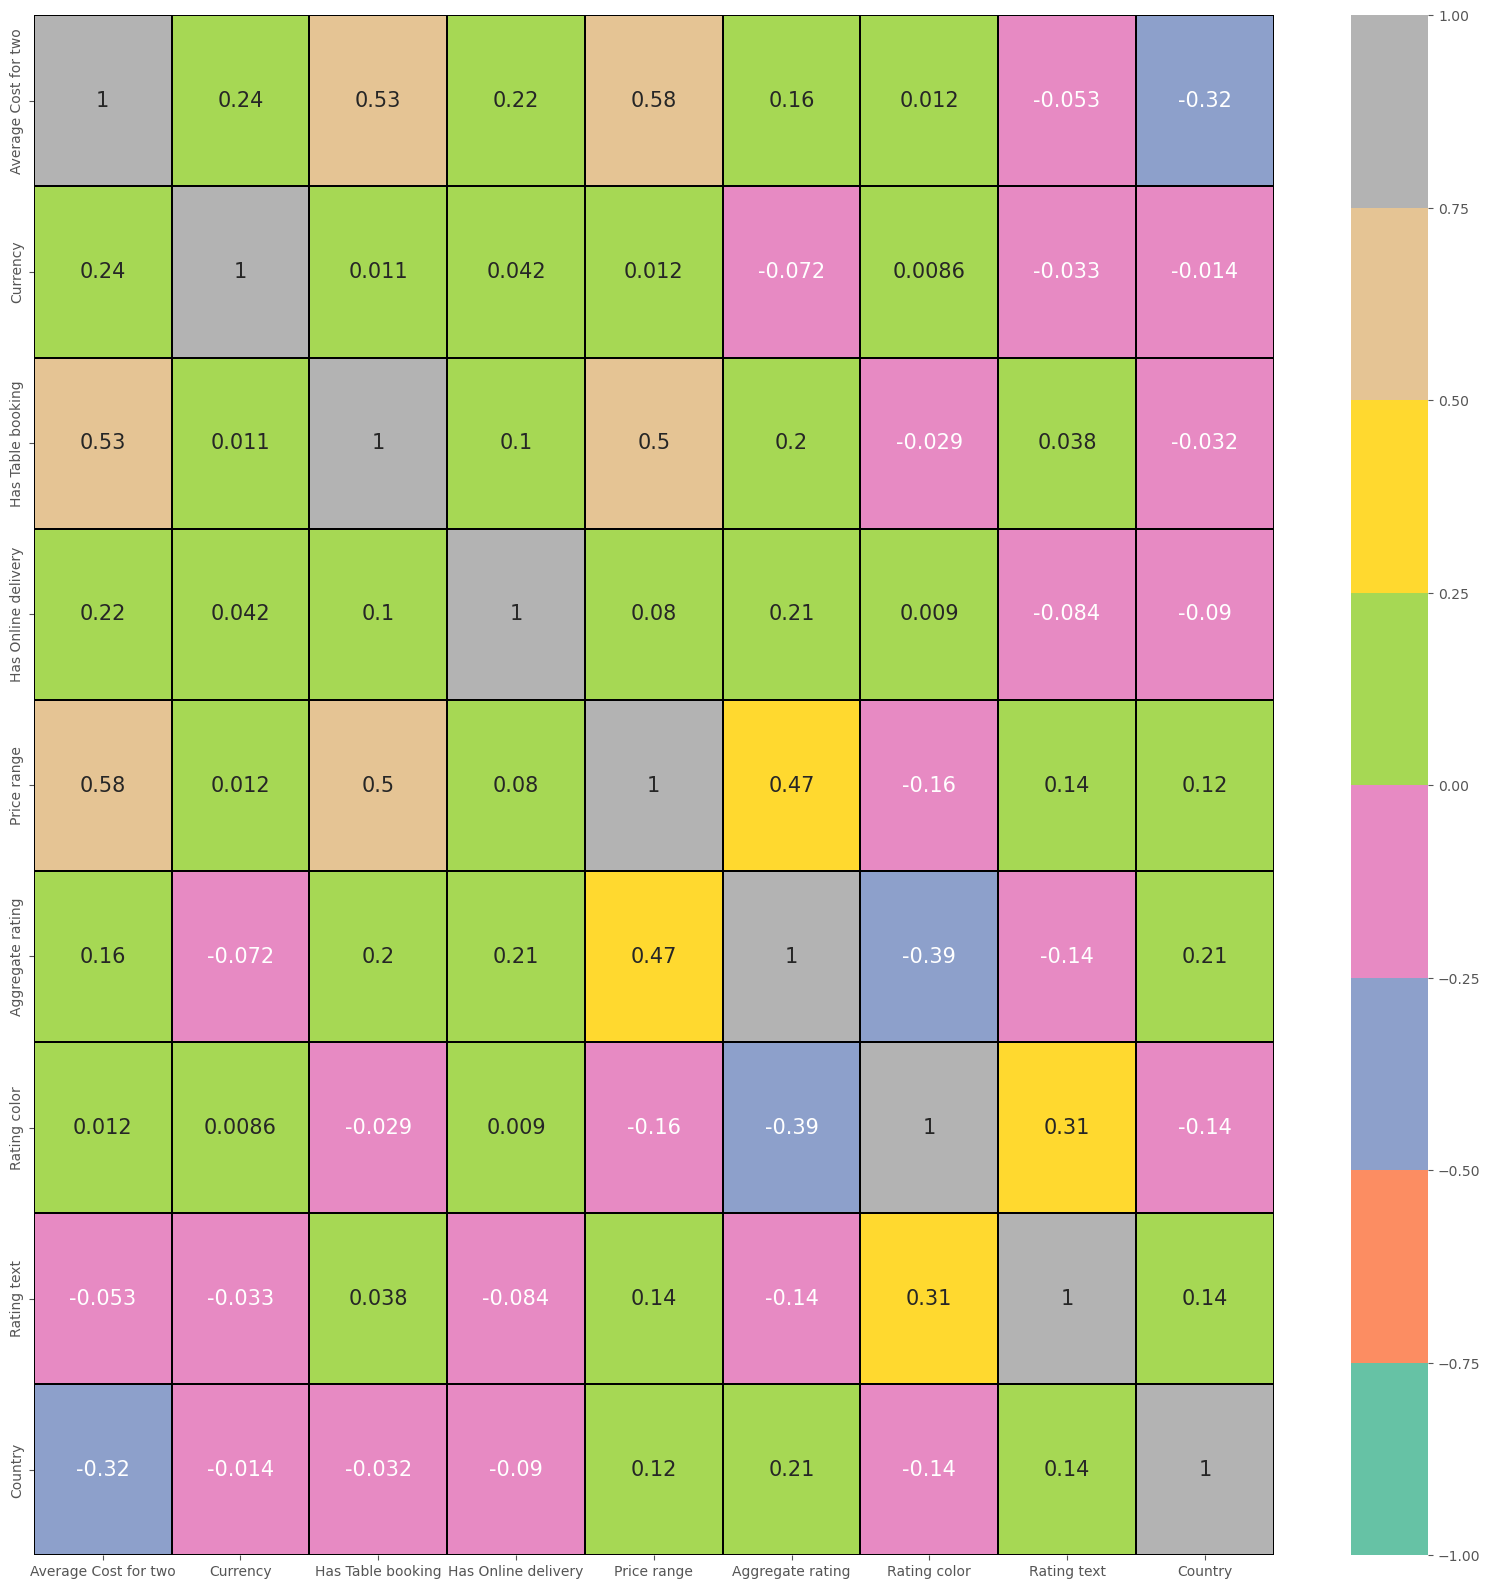

In [206]:
plt.figure(figsize=(20,20))
sns.heatmap(Classif_data.corr(), annot = True, linewidths=.1,vmin=-1, vmax=1, fmt='.2g', linecolor="black",annot_kws={'size':15},cmap="Set2")

<span class="burk">Seperating Label and Features:</span>

In [207]:
cl_x=Classif_data.drop("Price range",axis=1)  #features
cl_y=Classif_data['Price range']   #Label

In [208]:
cl_x.shape

(9530, 8)

In [209]:
cl_y.shape

(9530,)

<span class="burk">Standard Scalarization for feature scaling:</span>

In [210]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cl_x= pd.DataFrame(scaler.fit_transform(cl_x), columns=cl_x.columns)
cl_x

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Aggregate rating,Rating color,Rating text,Country
0,1.117203,-5.823668,2.688811,-0.588418,1.837778,-2.217775,-0.222848,1.200329
1,1.233533,-5.823668,2.688811,-0.588418,1.510366,-2.217775,-0.222848,1.200329
2,3.120772,-5.823668,2.688811,-0.588418,1.404186,-1.350509,1.504535,1.200329
3,1.543270,-5.823668,-0.371912,-0.588418,1.949853,-2.217775,-0.222848,1.200329
4,1.543270,-5.823668,2.688811,-0.588418,1.837778,-2.217775,-0.222848,1.200329
...,...,...,...,...,...,...,...,...
9525,-1.448927,6.811843,-0.371912,-0.588418,1.094612,-1.350509,1.504535,2.602052
9526,-1.252531,6.811843,-0.371912,-0.588418,1.196303,-1.350509,1.504535,2.602052
9527,-0.870383,6.811843,-0.371912,-0.588418,0.703019,1.323367,0.378592,2.602052
9528,-1.151132,6.811843,-0.371912,-0.588418,0.994431,-1.350509,1.504535,2.602052


<span class="burk">VIF values</span>

In [211]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(cl_x.values,i)
              for i in range(len(cl_x.columns))]
vif["Features"] = cl_x.columns

# Let's check the values
vif

,VIF values,Features
0,1.843242,Average Cost for two
1,1.118424,Currency
2,1.473389,Has Table booking
3,1.105773,Has Online delivery
4,1.402973,Aggregate rating
5,1.316288,Rating color
6,1.163799,Rating text
7,1.302160,Country


As the VIF scores are less than 10

In [212]:
# let us check whether our label is equaly ditributed
cl_y.value_counts()

1    4444
2    3112
3    1388
4     586
Name: Price range, dtype: int64

Our Label is not equally distributed so we need to use sampling technique( SMOTE) to make it normal

In [213]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
cl_x, cl_y = SM.fit_resample(cl_x,cl_y)
cl_y.value_counts

<bound method IndexOpsMixin.value_counts of 0        3
1        3
2        4
3        4
4        4
        ..
17771    4
17772    4
17773    4
17774    4
17775    4
Name: Price range, Length: 17776, dtype: int64>

<span class="burk">Model BUILDING:</span>

best random state:

In [214]:
#Finding best random state
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    clx_train,clx_test,cly_train,cly_test = train_test_split(cl_x,cl_y,test_size=.25, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(clx_train, cly_train)
    pred = DTC.predict(clx_test)
    acc=accuracy_score(cly_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9747974797479748  on Random_state  173


<span class="burk">Creating train_test split:</span>

In [215]:
clx_train,clx_test,cly_train,cly_test = train_test_split(cl_x,cl_y,test_size=.30, random_state =maxRS)

<span class="burk">importing Classification Alogorithms:</span>

In [216]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

Decision Tree Classifier:

In [217]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(clx_train,cly_train)

#Prediction
pred = DTC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred))
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,cl_x,cl_y,cv=5).mean())

0.9709356834802175
[[1323    6    0    0]
 [  12 1287   16    2]
 [   0   46 1214   39]
 [   0    1   33 1354]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1329
           2       0.96      0.98      0.97      1317
           3       0.96      0.93      0.95      1299
           4       0.97      0.98      0.97      1388

    accuracy                           0.97      5333
   macro avg       0.97      0.97      0.97      5333
weighted avg       0.97      0.97      0.97      5333

0.9625916380705577


RandomForestClassifier

In [218]:
RFC = RandomForestClassifier()
RFC.fit(clx_train,cly_train)

#Prediction
pred = RFC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(RFC,cl_x,cl_y,cv=5).mean()*100)

97.20607537971124
[[1320    9    0    0]
 [  10 1276   28    3]
 [   0   31 1230   38]
 [   0    0   30 1358]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1329
           2       0.97      0.97      0.97      1317
           3       0.95      0.95      0.95      1299
           4       0.97      0.98      0.97      1388

    accuracy                           0.97      5333
   macro avg       0.97      0.97      0.97      5333
weighted avg       0.97      0.97      0.97      5333

Corross Validation Score 95.98361122581196


SVM

In [219]:
SVM = SVC()
SVM.fit(clx_train,cly_train)

#Prediction
pred = SVM.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(SVM,cl_x,cl_y,cv=5).mean()*100)

91.71198199887492
[[1229   95    5    0]
 [   8 1225   80    4]
 [   0   37 1127  135]
 [   2    0   76 1310]]
              precision    recall  f1-score   support

           1       0.99      0.92      0.96      1329
           2       0.90      0.93      0.92      1317
           3       0.88      0.87      0.87      1299
           4       0.90      0.94      0.92      1388

    accuracy                           0.92      5333
   macro avg       0.92      0.92      0.92      5333
weighted avg       0.92      0.92      0.92      5333

Corross Validation Score 89.68876200601507


KNN

In [220]:
knn = KNN()
knn.fit(clx_train,cly_train)

#Prediction
pred = knn.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(knn,cl_x,cl_y,cv=5).mean()*100)

95.98724920307518
[[1315   12    1    1]
 [  11 1250   53    3]
 [   0   35 1217   47]
 [   1    0   50 1337]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1329
           2       0.96      0.95      0.96      1317
           3       0.92      0.94      0.93      1299
           4       0.96      0.96      0.96      1388

    accuracy                           0.96      5333
   macro avg       0.96      0.96      0.96      5333
weighted avg       0.96      0.96      0.96      5333

Corross Validation Score 94.47033519544235


BaggingClassifier

In [221]:
BC= BaggingClassifier()
BC.fit(clx_train,cly_train)

#Prediction
pred = BC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(BC,cl_x,cl_y,cv=5).mean()*100)

97.14982186386649
[[1321    8    0    0]
 [  10 1277   28    2]
 [   0   37 1225   37]
 [   0    1   29 1358]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1329
           2       0.97      0.97      0.97      1317
           3       0.96      0.94      0.95      1299
           4       0.97      0.98      0.98      1388

    accuracy                           0.97      5333
   macro avg       0.97      0.97      0.97      5333
weighted avg       0.97      0.97      0.97      5333

Corross Validation Score 96.30417242148528


GradientBoostingClassifier

In [222]:
GBC = GradientBoostingClassifier()
GBC.fit(clx_train,cly_train)

#Prediction
pred = GBC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(GBC,cl_x,cl_y,cv=5).mean()*100)

96.17476092255765
[[1323    6    0    0]
 [  13 1277   26    1]
 [   0   47 1202   50]
 [   0    0   61 1327]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1329
           2       0.96      0.97      0.96      1317
           3       0.93      0.93      0.93      1299
           4       0.96      0.96      0.96      1388

    accuracy                           0.96      5333
   macro avg       0.96      0.96      0.96      5333
weighted avg       0.96      0.96      0.96      5333

Corross Validation Score 95.03289620443013


<span class="burk">Hyper Parameter Tuning</span>

In [233]:
from sklearn.model_selection import GridSearchCV
# Random forest classifier
RFC = RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}

In [234]:
GCV=GridSearchCV(RFC,parameters,cv=5)
GCV.fit(clx_train,cly_train)
print(GCV.best_params_)

{'max_features': 'log2', 'n_estimators': 150}


In [236]:
price_range_Model = RandomForestClassifier(max_features='log2',n_estimators=150 )
price_range_Model.fit(clx_train, cly_train)
pred = price_range_Model.predict(clx_test)
acc=accuracy_score(cly_test,pred)
print("Accuracy Score",acc*100)

Accuracy Score 97.33733358334896



<span class="burk">saving the model</span>

In [237]:
# Saving the model using .pkl

import joblib
joblib.dump(price_range_Model,"Zomato.pkl")

['Zomato.pkl']

<span class="burk">loading the model</span>

In [238]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Zomato.pkl")

#Prediction
prediction = model.predict(clx_test)
prediction

array([1, 4, 2, ..., 2, 4, 1], dtype=int64)

In [241]:
a = np.array(cly_test)
pred = np.array(model.predict(clx_test))
df_final = pd.DataFrame({"Original":a,"Predicted":pred},index=range(len(a)))
df_final

,Original,Predicted
0,1,1
1,4,4
2,2,2
3,4,4
4,2,2
...,...,...
5328,4,4
5329,2,2
5330,2,2
5331,4,4


<span class="burk">plotting for prediction</span>

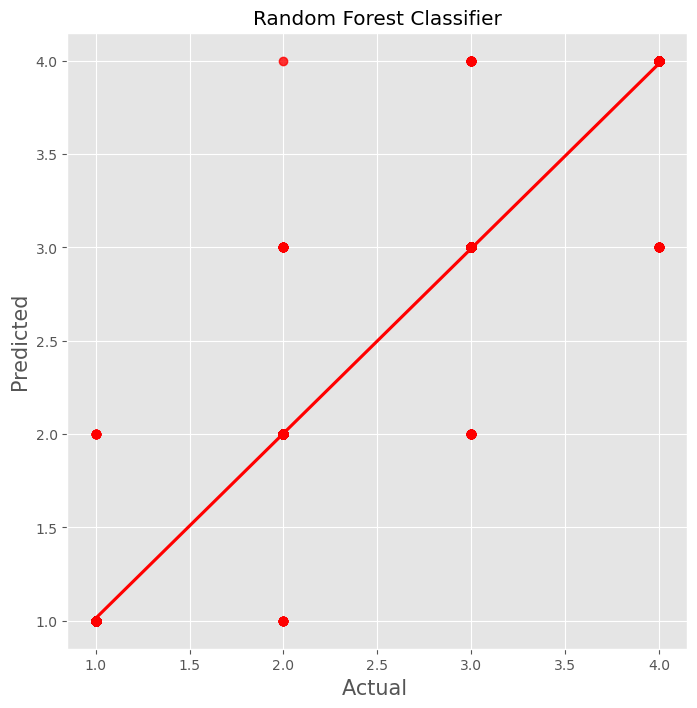

In [242]:
plt.figure(figsize=(8,8))
sns.regplot(cly_test,prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Random Forest Classifier")
plt.show()

Clonclusion:-

Our 1st model regression 'ACOT_model' achived an accuracy of 89.87%

Our Second model Classification 'price_range_Model' achived an accuracy of 97.33%

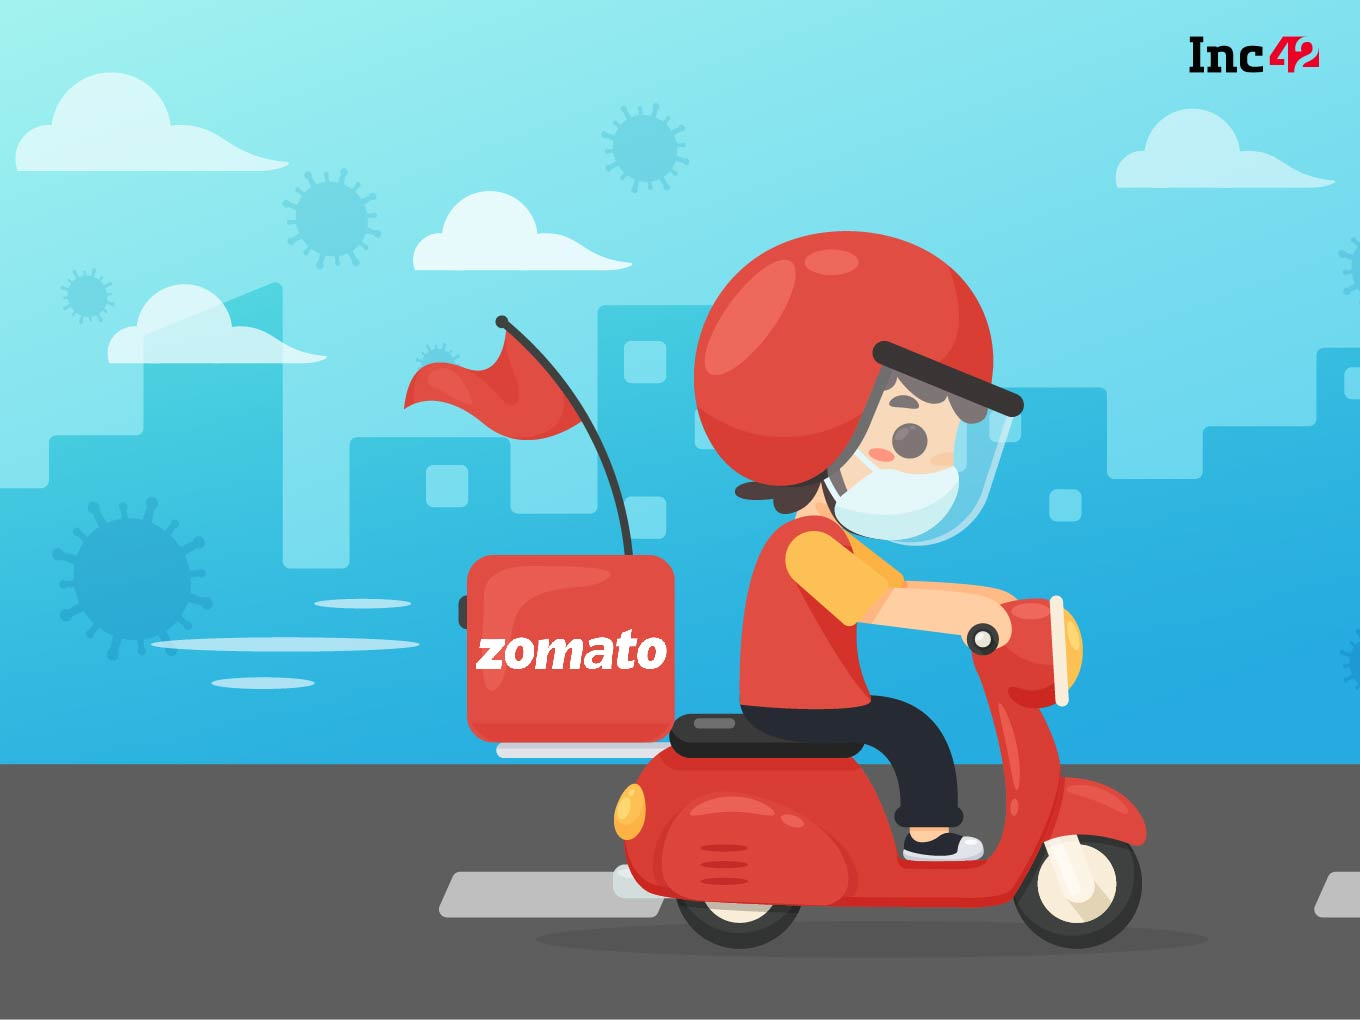